## EDA - Key Findings

**Key Findings**
- Raw incident volume is not a reliable performance indicator, normalization is essential to avoid penalizing efficient, high-volume suppliers.
- Certain layout + method combinations should be reviewed or redesigned due to consistent associations with poor packaging.
- Garment complexity and fabric delicacy are linked to bad packaging outcomes, implying that better configuration tailoring or specialized handling may reduce error rates.
- Suppliers D and H need intervention due to persistent underperformance, while Supplier G offers a potential benchmark for consistent quality at lower volumes.


**Areas for Future Investigation**
- Interactions between issue type and product attributes (i.e. garnment type, material, size) and packaging attributes (i.e. folding and layout)

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
density_df = pd.read_csv('processed/density_reports.csv')
product_df = pd.read_csv('processed/product_attributes.csv')
supplier_df = pd.read_csv('processed/supplier_scorecard.csv')
incidents_df = pd.read_csv('processed/historical_incidents.csv')

In [179]:
# Display basic info to confirm successful loading
print("Density Reports:")
print(density_df.info())
print("\n")

print("Product Attributes:")
print(product_df.info())
print("\n")

print("Supplier Scorecard:")
print(supplier_df.info())
print("\n")

print("Historical Incidents:")
print(incidents_df.info())

Density Reports:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478846 entries, 0 to 478845
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ReportID                478846 non-null  object 
 1   ProductReference        478846 non-null  object 
 2   DateOfReport            478846 non-null  object 
 3   SupplierName            478846 non-null  object 
 4   GarmentType             478846 non-null  object 
 5   Material                478846 non-null  object 
 6   Weight                  478846 non-null  float64
 7   ProposedUnitsPerCarton  478846 non-null  float64
 8   ProposedFoldingMethod   478846 non-null  object 
 9   ProposedLayout          478846 non-null  object 
 10  PackagingQuality        478846 non-null  object 
dtypes: float64(2), object(9)
memory usage: 40.2+ MB
None


Product Attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (t

# Density Report

### Univariate Analysis


**Numerical Columns**

In [180]:
print("\nSummary Statistics (Numeric Columns):")
print(density_df[['Weight', 'ProposedUnitsPerCarton']].describe())


Summary Statistics (Numeric Columns):
              Weight  ProposedUnitsPerCarton
count  478846.000000           478846.000000
mean        0.461068               24.849623
std         0.349731               11.054909
min         0.080000                4.000000
25%         0.210000               16.000000
50%         0.330000               25.000000
75%         0.620000               32.000000
max         2.320000               49.000000


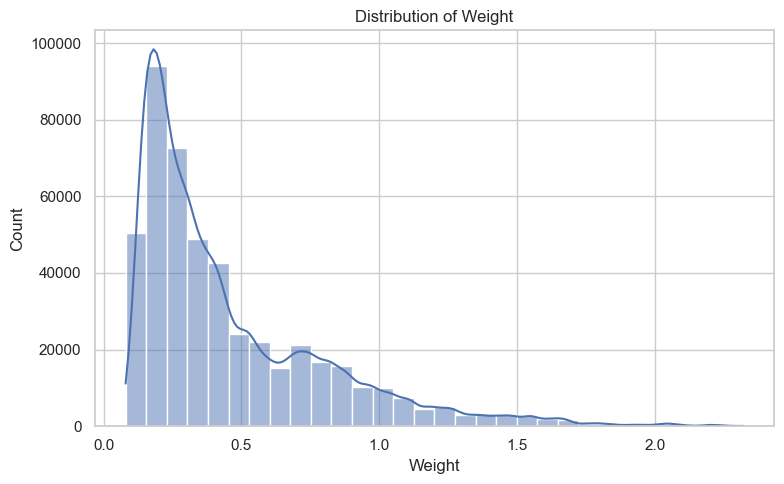

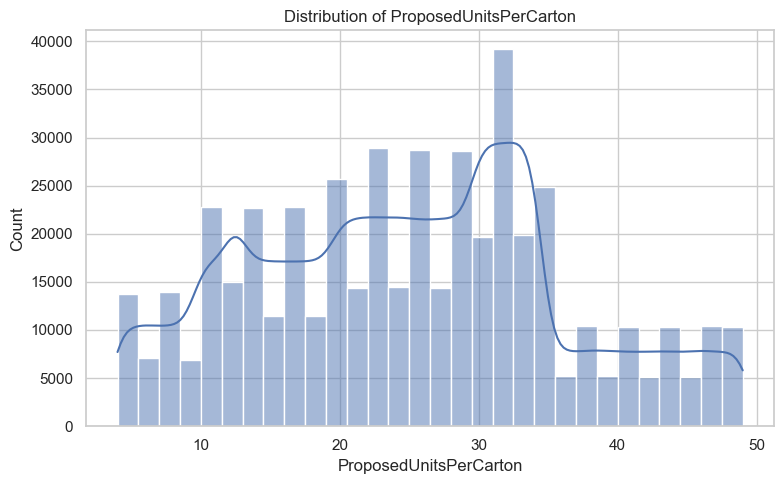

In [181]:
numerical_cols = ['Weight', 'ProposedUnitsPerCarton']
for col in numerical_cols:
    plt.figure()
    sns.histplot(data=density_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

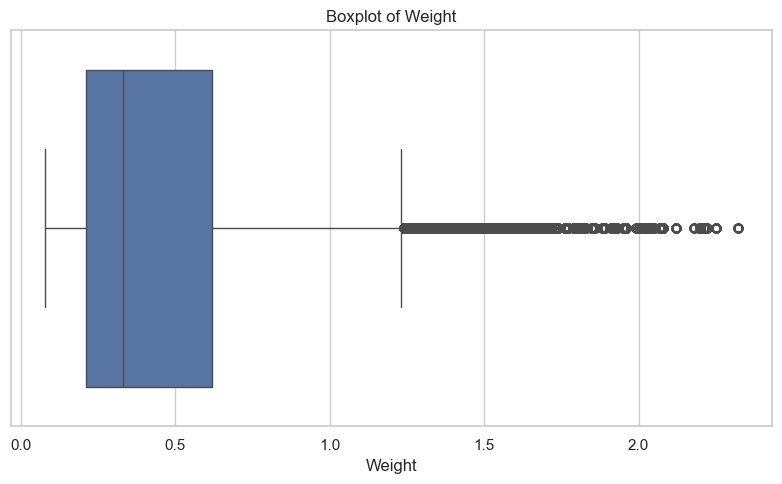

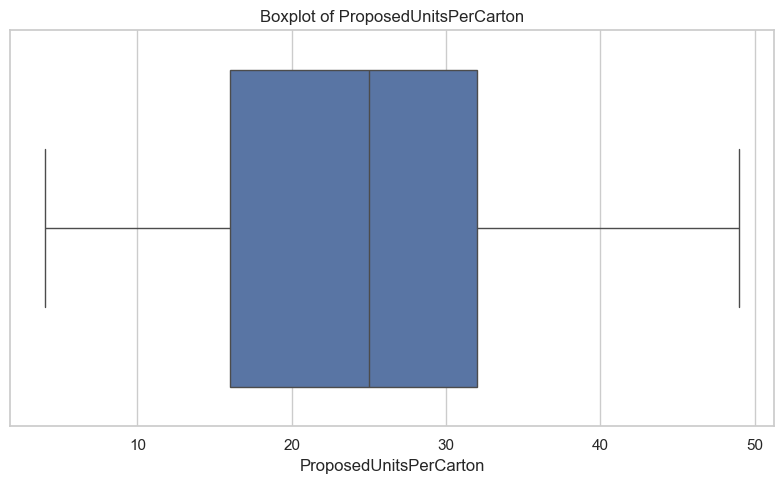

In [182]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=density_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

**Categorical columns**

In [183]:
categorical_cols = ['PackagingQuality', 'GarmentType', 'Material', 
                    'ProposedFoldingMethod', 'ProposedLayout', 'SupplierName']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(density_df[col].value_counts())


Value counts for PackagingQuality:
PackagingQuality
Good         382355
Bad           94700
Uncertain      1791
Name: count, dtype: int64

Value counts for GarmentType:
GarmentType
Shirt      97444
Pants      72395
Jacket     49280
T-Shirt    46287
Dress      39133
Skirt      39009
Suit       28760
Shorts     25176
Coat       23583
Sweater    22593
Blouse     22472
Hoodie     12714
Name: count, dtype: int64

Value counts for Material:
Material
Cotton       188797
Polyester    119879
Linen         48164
Wool          47274
Silk          40132
Denim         34600
Name: count, dtype: int64

Value counts for ProposedFoldingMethod:
ProposedFoldingMethod
Method2    212320
Method1    154116
Method3    110090
Method4      2320
Name: count, dtype: int64

Value counts for ProposedLayout:
ProposedLayout
LayoutB    172638
LayoutC    136014
LayoutA     82853
LayoutD     61894
LayoutE     20528
LayoutF      2462
LayoutX      2457
Name: count, dtype: int64

Value counts for SupplierName:
SupplierNam

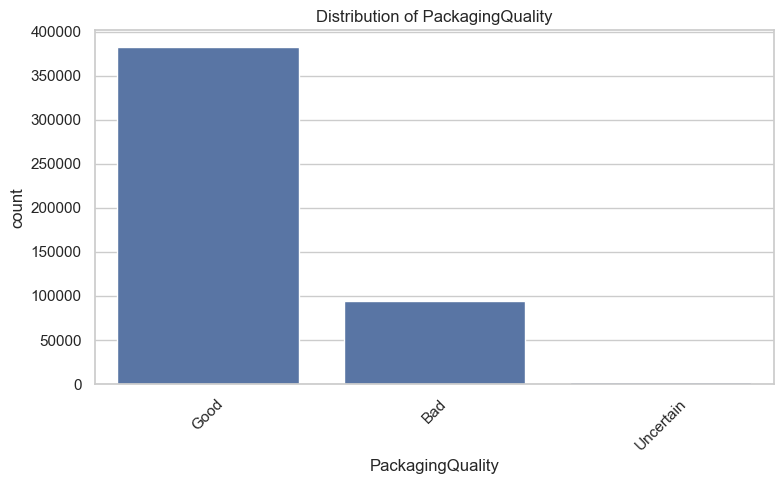

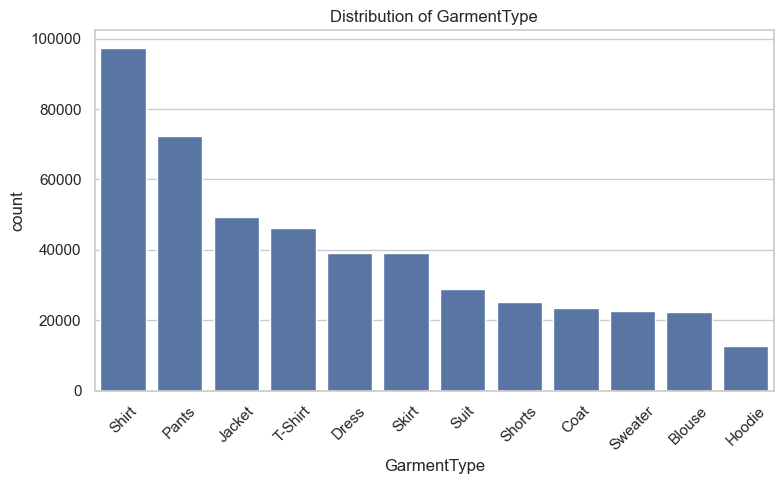

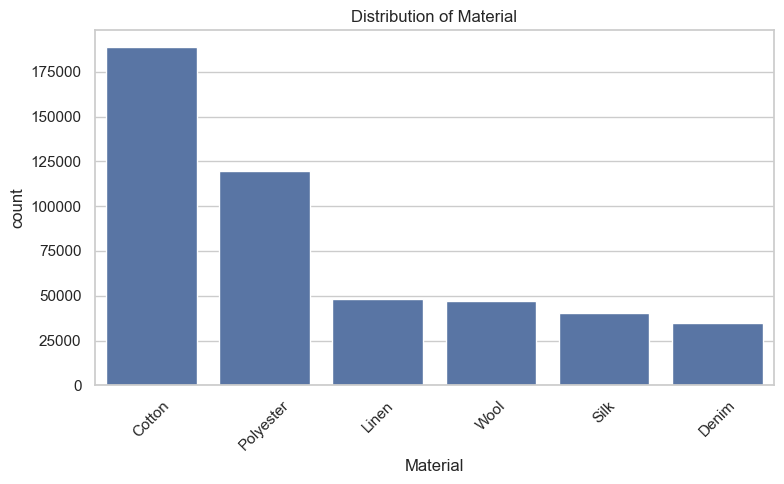

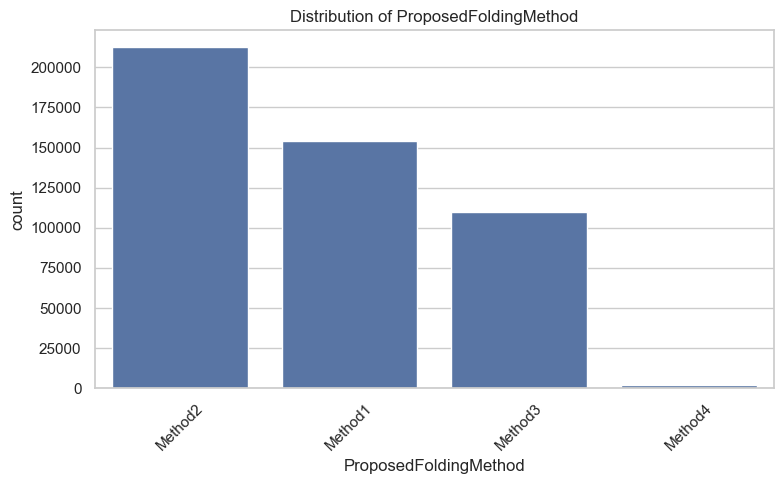

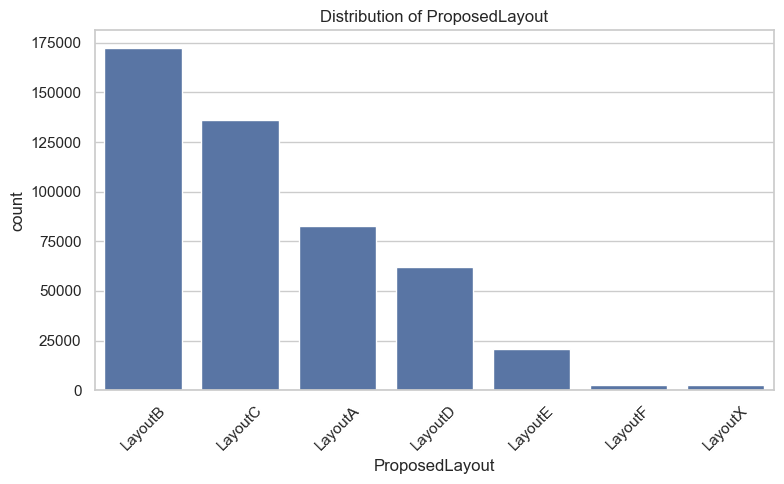

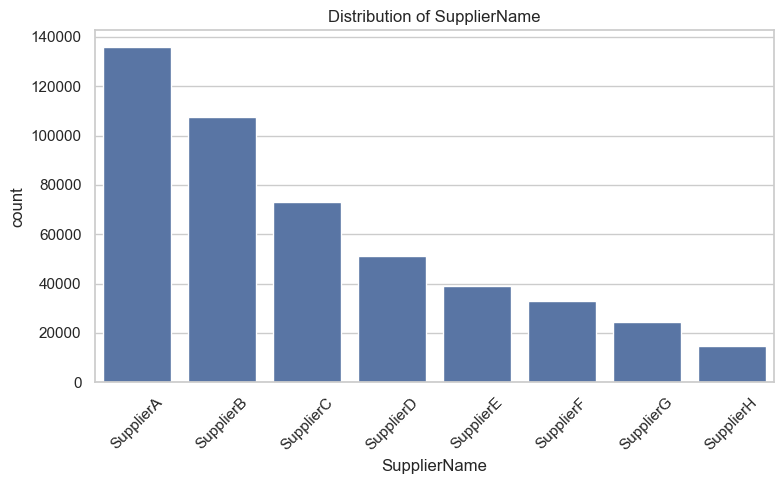

In [184]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=density_df, x=col, order=density_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Bivariate Analysis
**Key Takeaways**
| Variable                  | Univariate Insight                   | Bivariate Goal                                           |
| ------------------------- | ------------------------------------ | -------------------------------------------------------- |
| `PackagingQuality`        | Imbalanced target                    | Normalize by group when comparing across other variables |
| `GarmentType`, `Material` | Dominated by a few classes           | See if specific types are more prone to bad packaging    |
| `FoldingMethod`, `Layout` | Has suspicious/rare values           | Investigate if these are error-prone or high-risk        |
| `Weight`                  | Skewed with long tail                | Check if outliers drive more bad packaging               |
| `UnitsPerCarton`          | Some concentration at certain values | Explore if optimal values cluster around better outcomes |

**Categorical Columns by Packaging Quality**
- **Normalized cross-tabulation** converts raw counts into proportions (e.g., per row), allowing for fair comparison across categories regardless of sample size. For example, it shows what percentage of each `GarmentType` was labeled as "Good" or "Bad" by ensuring each row sums to 1.

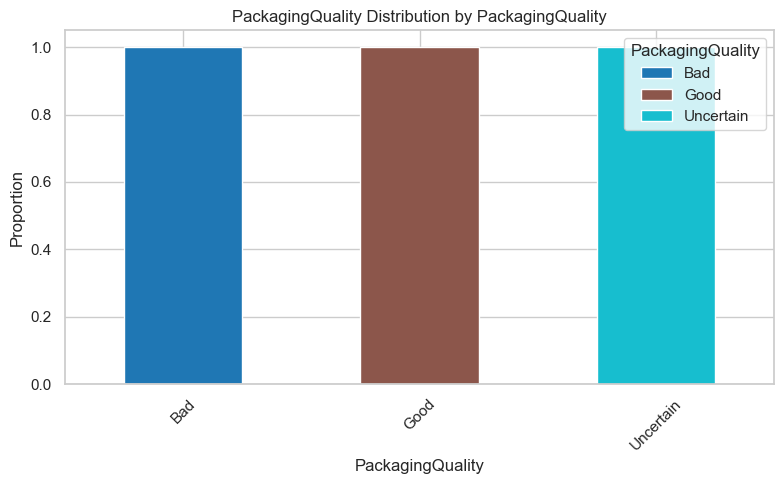

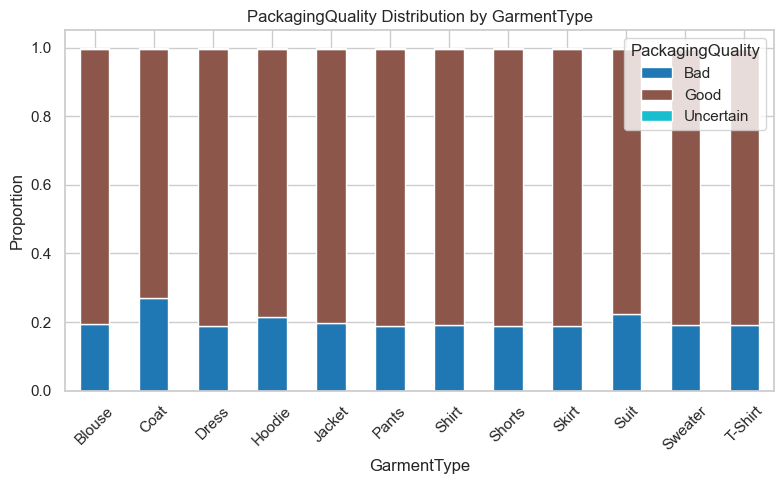

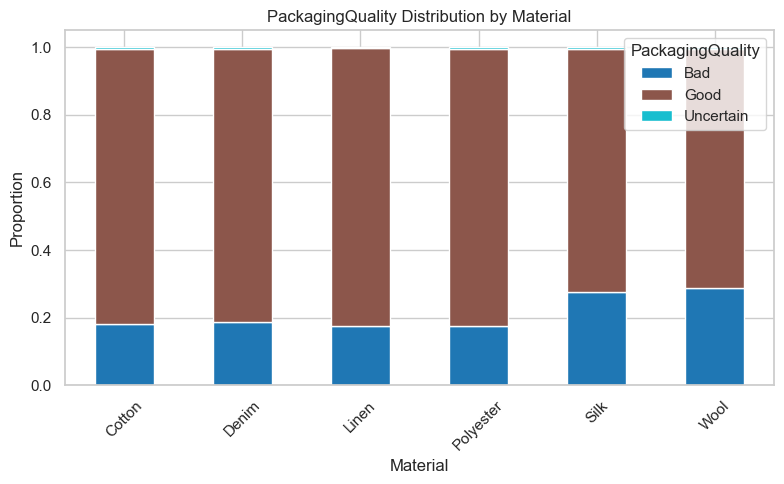

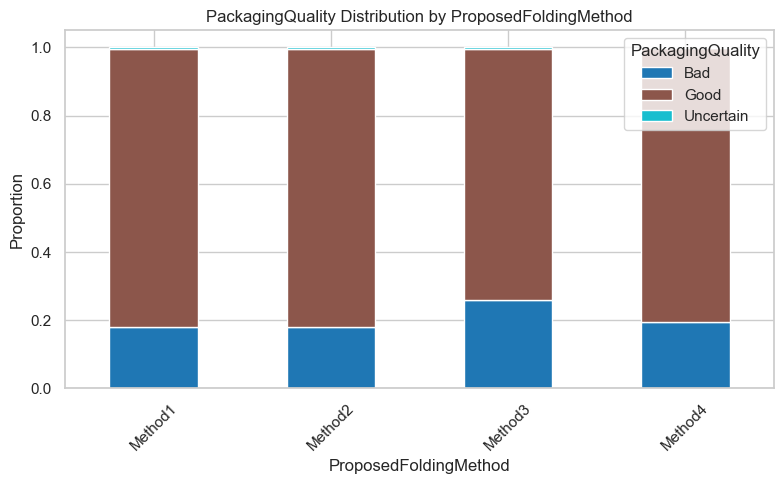

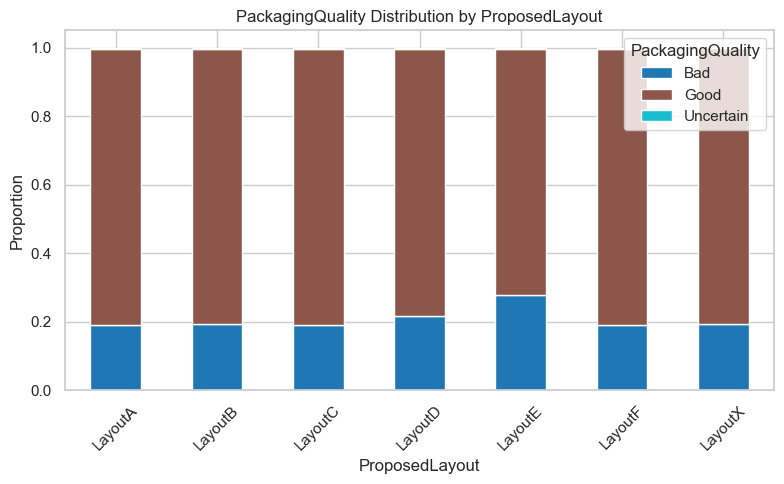

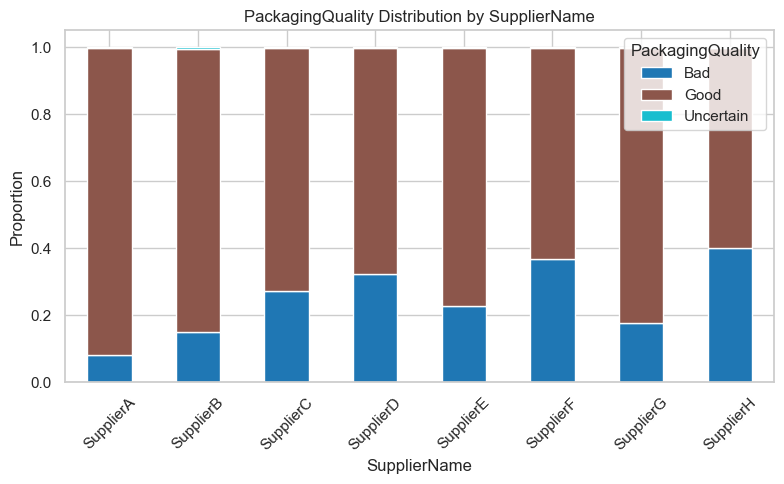

In [185]:
for feature in categorical_cols:
    # Create normalized cross-tabulation of PackagingQuality
    cross_tab = pd.crosstab(
        density_df[feature],
        density_df['PackagingQuality'],
        normalize='index'  # normalize by row
    )

    # Sort index for consistent ordering
    cross_tab = cross_tab.sort_index()

    # Plot
    cross_tab.plot(
        kind='bar',
        stacked=True,
        colormap='tab10'
    )

    # Styling
    plt.title(f'PackagingQuality Distribution by {feature}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title='PackagingQuality', loc='upper right')
    plt.tight_layout()
    plt.show()

Noticed that 'Uncertain' labels were rare and hard to compare in the previous plots
- Below, we checked if uncertainty in packing outcome is more apparent across certain categories
- Overall, uncertainty appears to be a rare but systematic part of the packaging process, likely due to ambiguous assessments or in-progress evaluations and not specific to certain categorical features

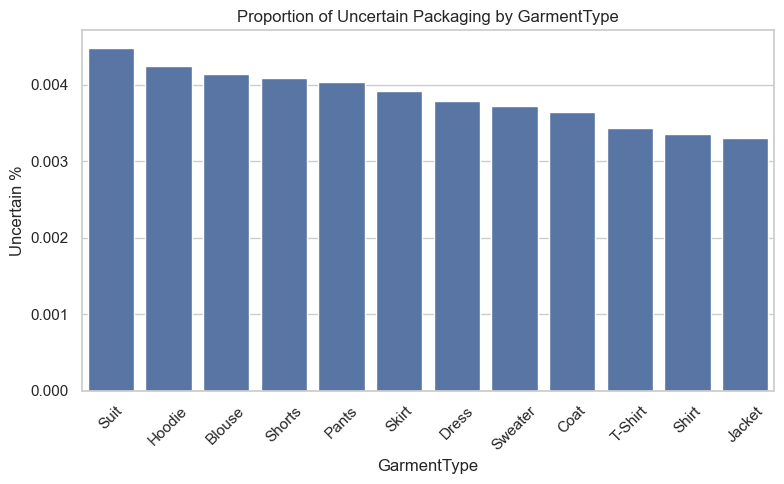

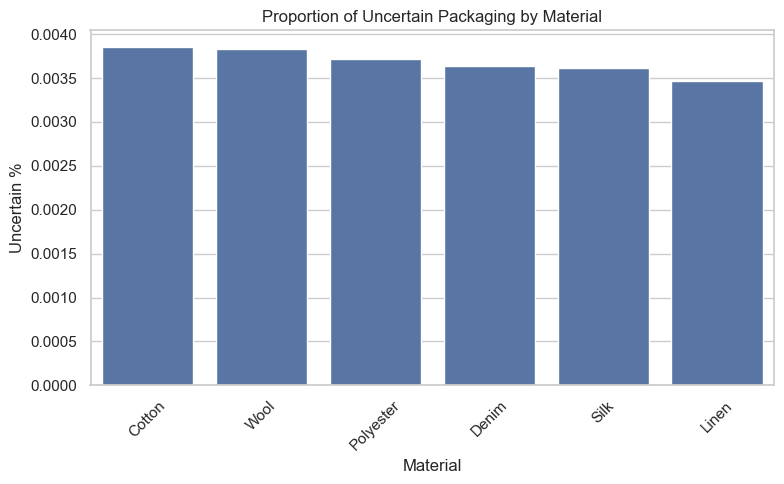

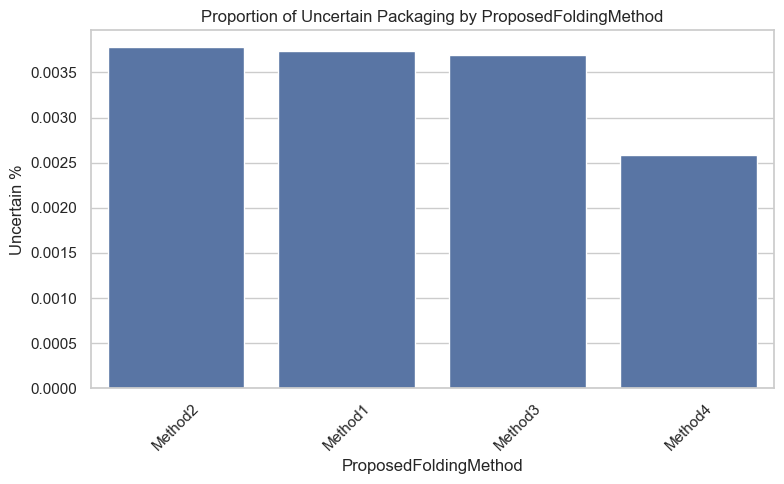

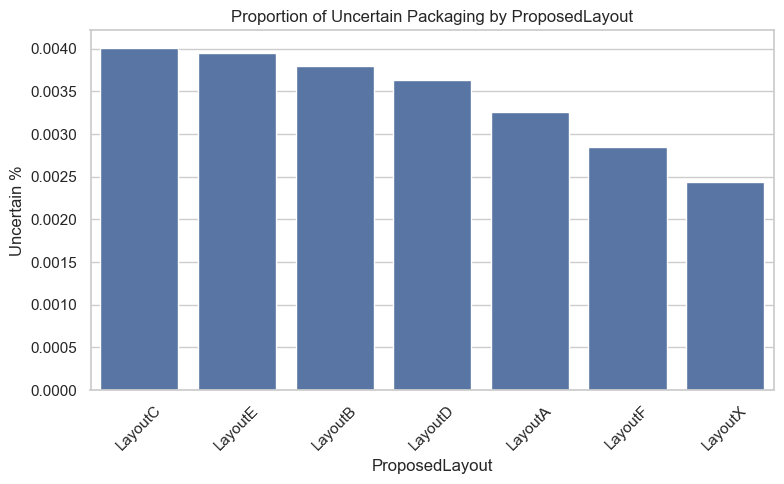

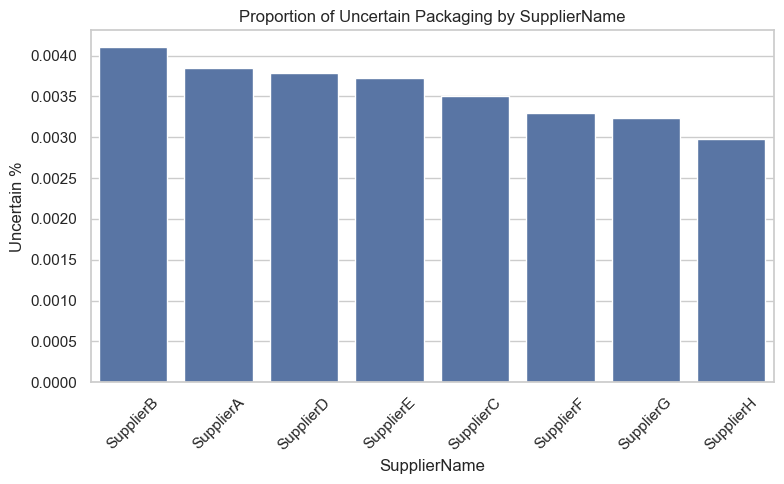

In [186]:
# Filter for uncertain rows
uncertain_df = density_df[density_df['PackagingQuality'] == 'Uncertain']

features = ['GarmentType', 'Material', 'ProposedFoldingMethod', 'ProposedLayout', 'SupplierName']

# Loop through each feature to calculate and plot uncertainty proportions
for feature in features:
    # Count of uncertain and total per category
    uncertain_counts = uncertain_df[feature].value_counts()
    total_counts = density_df[feature].value_counts()

    # Compute proportion
    uncertainty_pct = (uncertain_counts / total_counts).fillna(0).sort_values(ascending=False)

    # Plot
    plt.figure()
    sns.barplot(x=uncertainty_pct.index, y=uncertainty_pct.values)
    plt.title(f'Proportion of Uncertain Packaging by {feature}')
    plt.ylabel('Uncertain %')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The investigation into categorical variables by packaging quality revealed certain categories with disproportionately higher 'bad' packaging rates, namely:
- Garnment Type: Suits and Coats
- Material: Silk and Wool
- Proposed Folding Method: Method 3
- Propsoed Layout: Layout E
- Supplier Name: Supplier H, Supplier F, Supplier D

The purpose of the following section is to investigate if these high risk categories are interrelated, specifically:
- Whether certain **garment types or materials** are more frequently paired with the **riskier layouts or folding methods**
- Whether the most failure-prone **layout + folding method combinations** disproportionately appear with specific garments or fabrics

/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/681160504.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layout_method_filtered['Combo'] = layout_method_filtered['ProposedLayout'] + ' + ' + layout_method_filtered['ProposedFoldingMethod']
/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/681160504.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combos, x='Bad', y='Combo', palette='Reds_d')


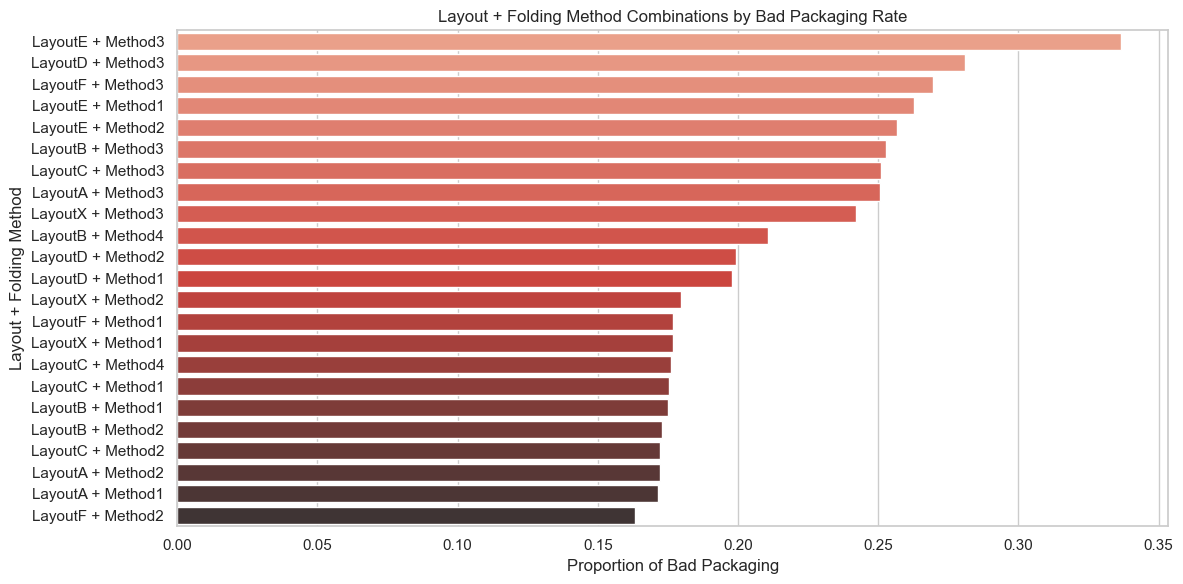

In [187]:
# Filter out 'Uncertain' labels
filtered_df = density_df[density_df['PackagingQuality'].isin(['Good', 'Bad'])]

# Calculate bad rate for each layout + folding method combination
layout_method_bad_rates = (
    filtered_df
    .groupby(['ProposedLayout', 'ProposedFoldingMethod'])['PackagingQuality']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .reset_index()
    .sort_values(by='Bad', ascending=False)
)

# Add count for filtering
combo_counts = (
    filtered_df
    .groupby(['ProposedLayout', 'ProposedFoldingMethod'])['PackagingQuality']
    .count()
    .reset_index(name='Count')
)

# Merge and filter for combos with at least 500 records
layout_method_bad_rates = pd.merge(layout_method_bad_rates, combo_counts, on=['ProposedLayout', 'ProposedFoldingMethod'])
layout_method_filtered = layout_method_bad_rates[layout_method_bad_rates['Count'] >= 500]

# Create label for each combo
layout_method_filtered['Combo'] = layout_method_filtered['ProposedLayout'] + ' + ' + layout_method_filtered['ProposedFoldingMethod']

# Plot top 15 by bad rate
top_combos = layout_method_filtered.sort_values(by='Bad', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_combos, x='Bad', y='Combo', palette='Reds_d')
plt.title('Layout + Folding Method Combinations by Bad Packaging Rate')
plt.xlabel('Proportion of Bad Packaging')
plt.ylabel('Layout + Folding Method')
plt.tight_layout()
plt.show()

**Key Takeaways**
- Most of the worst performing combinations involve Method 3, regardless of layout (potentially a systematic risk factor)
- Layout E frequently appears in risky combinations
- Bad packaging rates range from 16% (best) to 34% (worst), nearly a 2x difference implying layout+folding method can make or break packaging quality

Next we will check if risky layout and folding methods identified here appear more frequently for certain Garnment Types, Materials or Suppliers


/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/2977983682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_risky_combo'] = filtered_df.apply(
/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/2977983682.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=garment_risk, x='RiskyComboRate', y='GarmentType', palette='Reds_r')


/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/2977983682.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=material_risk, x='RiskyComboRate', y='Material', palette='Reds_r')


/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/2977983682.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suppliers, x='RiskyComboRate', y='SupplierName', palette='Reds_r')


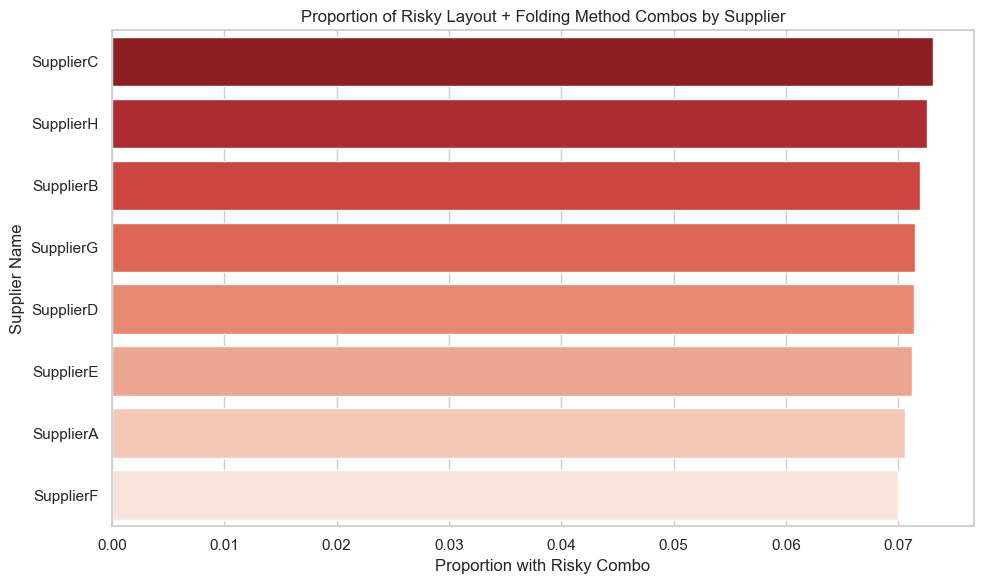

In [188]:
# Define risky combinations
risky_combos = [
    ('LayoutE', 'Method3'),
    ('LayoutD', 'Method3'),
    ('LayoutF', 'Method3'),
    ('LayoutE', 'Method1'),
    ('LayoutE', 'Method2')
]

# Create flag column for risky combos
filtered_df['is_risky_combo'] = filtered_df.apply(
    lambda row: (row['ProposedLayout'], row['ProposedFoldingMethod']) in risky_combos,
    axis=1
)

# Calculate risk rate by GarmentType
garment_risk = (
    filtered_df.groupby('GarmentType')['is_risky_combo']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='RiskyComboRate')
)

# Calculate risk rate by Material
material_risk = (
    filtered_df.groupby('Material')['is_risky_combo']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='RiskyComboRate')
)

# Calculate risk rate by SupplierName
supplier_risk = (
    filtered_df.groupby('SupplierName')['is_risky_combo']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='RiskyComboRate')
)

# Plot garment type chart
plt.figure(figsize=(10, 5))
sns.barplot(data=garment_risk, x='RiskyComboRate', y='GarmentType', palette='Reds_r')
plt.title('Proportion of Risky Layout + Folding Method Combos by Garment Type')
plt.xlabel('Proportion with Risky Combo')
plt.ylabel('Garment Type')
plt.tight_layout()
plt.show()

# Plot material type chart
plt.figure(figsize=(10, 5))
sns.barplot(data=material_risk, x='RiskyComboRate', y='Material', palette='Reds_r')
plt.title('Proportion of Risky Layout + Folding Method Combos by Material')
plt.xlabel('Proportion with Risky Combo')
plt.ylabel('Material')
plt.tight_layout()
plt.show()

# Plot supplier chart
top_suppliers = supplier_risk
plt.figure(figsize=(10, 6))
sns.barplot(data=top_suppliers, x='RiskyComboRate', y='SupplierName', palette='Reds_r')
plt.title('Proportion of Risky Layout + Folding Method Combos by Supplier')
plt.xlabel('Proportion with Risky Combo')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.show()



**Key Takeaways**
- Coats are heavily associated with risky layout + method combinations, followed by suits and hoodies 
- Suggests bulky and complex items are more likely to be paired with high-risk configurations
- Wool is also heavily associated with risky layout + method combinations, followed by denim, linen and silk
- Suggests delicate or less flexible materials are more likely to be subjected to inappropriate packaging set ups 
- There are no strong supplier-level patterns for disproportionately risky configuration use


**Numerical Variables by Packaging Quality**

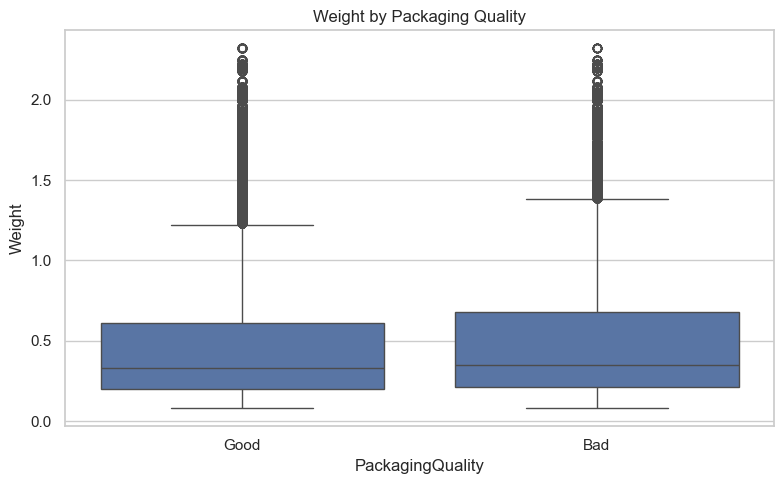

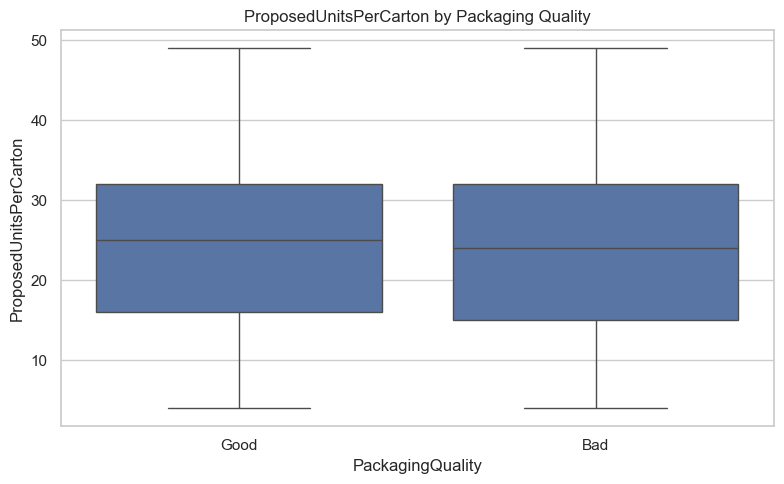

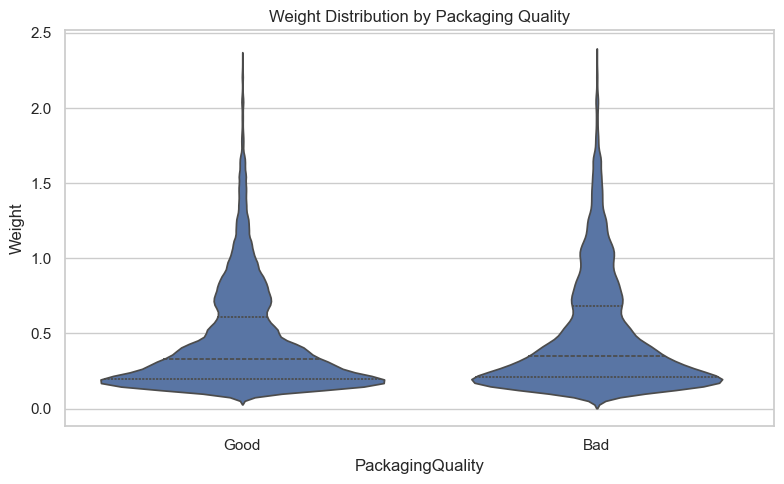

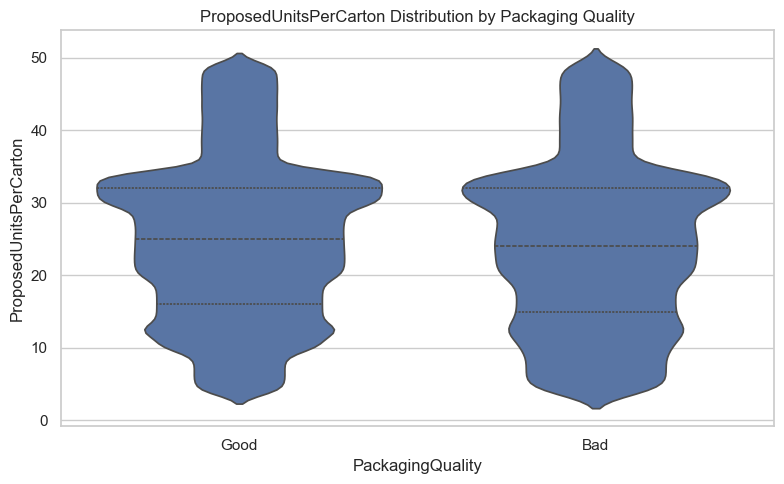

In [189]:
# List of numerical variables to compare against PackagingQuality
numerical_cols = ['Weight', 'ProposedUnitsPerCarton']

# Boxplots
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=filtered_df, x='PackagingQuality', y=col)
    plt.title(f'{col} by Packaging Quality')
    plt.tight_layout()
    plt.show()

# Violin plots (for more distribution insight)
for col in numerical_cols:
    plt.figure()
    sns.violinplot(data=filtered_df, x='PackagingQuality', y=col, inner='quartile')
    plt.title(f'{col} Distribution by Packaging Quality')
    plt.tight_layout()
    plt.show()

**Key Takeaways**

Weight vs Packaging Quality
- Slight upward shift in median and spread for "Bad" labels.
- The violin plot shows heavier items tend to appear more often in bad packaging cases

Proposed Units Per Carton vs Packaging Quality
- No meaningful difference in distribution, central tendency, or shape.
- Both "Good" and "Bad" categories share nearly identical patterns.

Implication: consider transforming weight because of its skew if we use a model that assumes normality (e.g. log transformation, bin heavy tails)

### Temporal Trends

/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/1626158516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateOfReport'] = pd.to_datetime(density_df['DateOfReport'], errors='coerce')
/var/folders/8k/936n5brn6db_y33t7hjrl_3c0000gn/T/ipykernel_21087/1626158516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['DateOfReport'].dt.to_period('M').dt.to_timestamp()


<Figure size 1200x500 with 0 Axes>

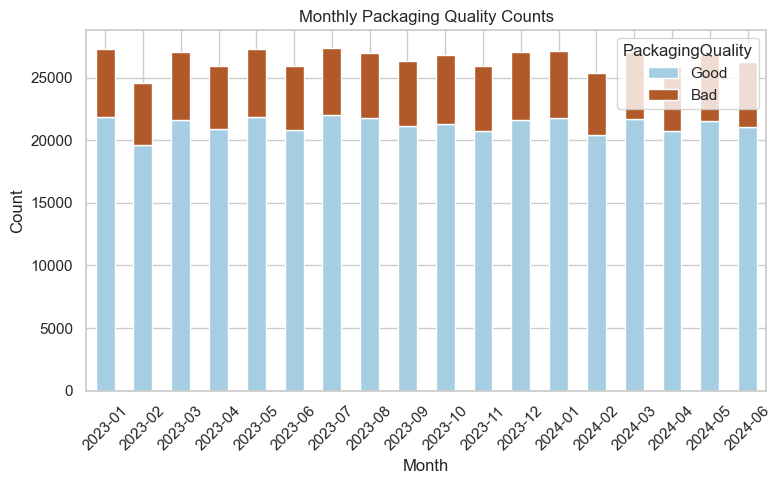

In [190]:
filtered_df['DateOfReport'] = pd.to_datetime(density_df['DateOfReport'], errors='coerce')

# Create a month column
filtered_df['Month'] = filtered_df['DateOfReport'].dt.to_period('M').dt.to_timestamp()

# Count Good and Bad per month
monthly_counts = filtered_df.groupby(['Month', 'PackagingQuality']).size().unstack().fillna(0)
monthly_counts['Total'] = monthly_counts['Good'] + monthly_counts['Bad']
monthly_counts['BadRate'] = monthly_counts['Bad'] / monthly_counts['Total']

# Plot count trends
plt.figure(figsize=(12, 5))
monthly_counts.index = monthly_counts.index.strftime('%Y-%m')  # Format to 'YYYY-MM'
monthly_counts[['Good', 'Bad']].plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Monthly Packaging Quality Counts')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bad rate trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_counts, x=monthly_counts.index, y='BadRate', marker='o')
plt.title('Monthly Bad Packaging Rate')
plt.ylabel('Bad Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- No evidence of seasonal deterioration or improvement, the process seems generally well controlled over time
- Small peaks in bad rate (like in October) could relate to external factors

# Product Attributes

### Univariate Analysis

**Numerical Columns**

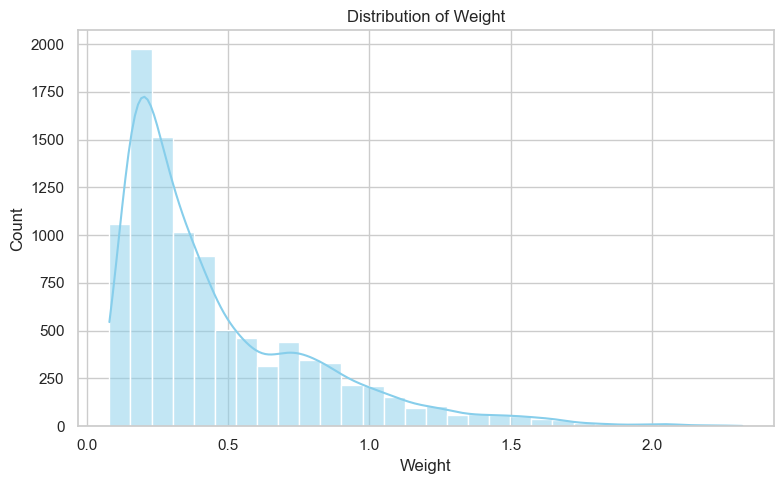

In [191]:
# Identify numeric and categorical columns
product_numeric_cols = product_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot distributions for numeric columns
for col in product_numeric_cols:
    plt.figure()
    sns.histplot(product_df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

**Categorical Columns**

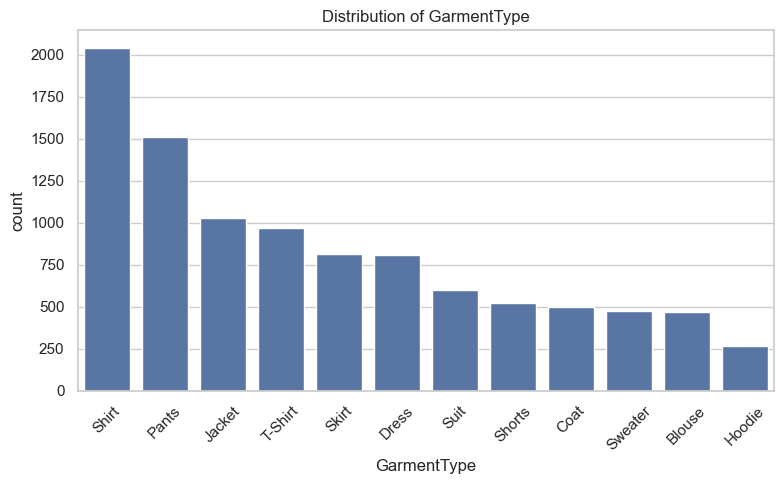

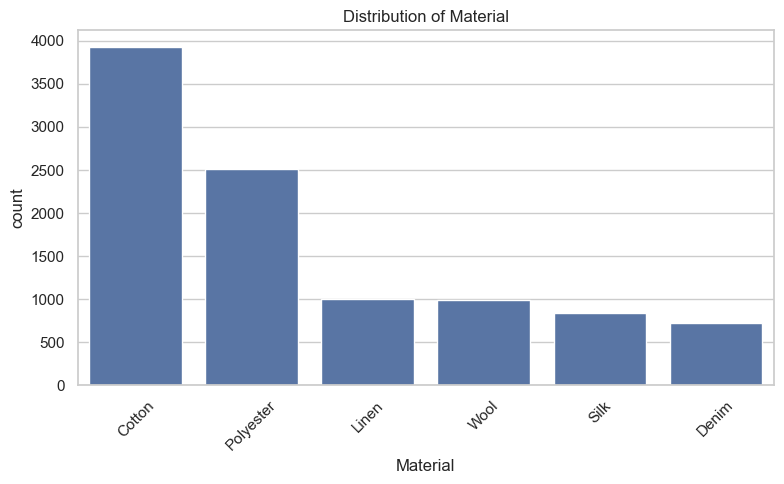

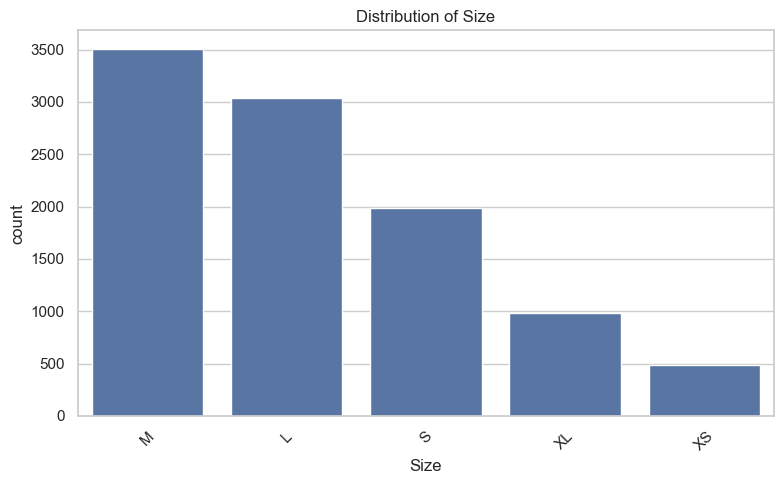

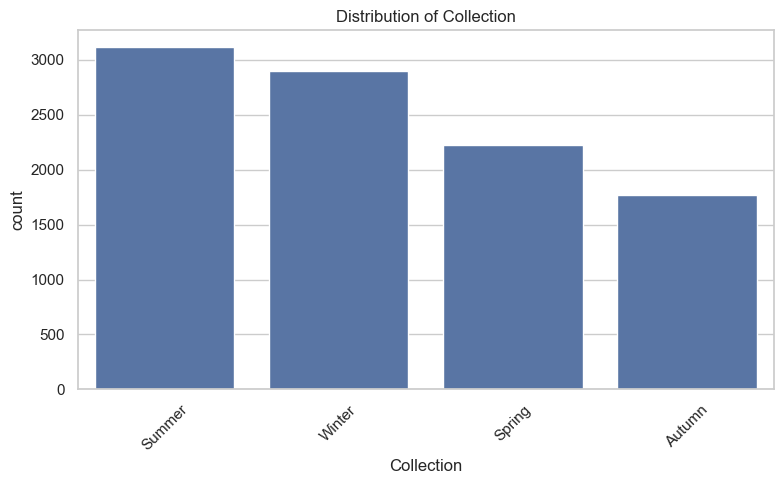

In [192]:
product_categorical_cols = product_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot countplots for categorical columns (limit to top 20 unique values)
for col in product_categorical_cols:
    if product_df[col].nunique() <= 20:
        plt.figure()
        sns.countplot(data=product_df, x=col, order=product_df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Supplier Scorecard

### Univariate Analysis

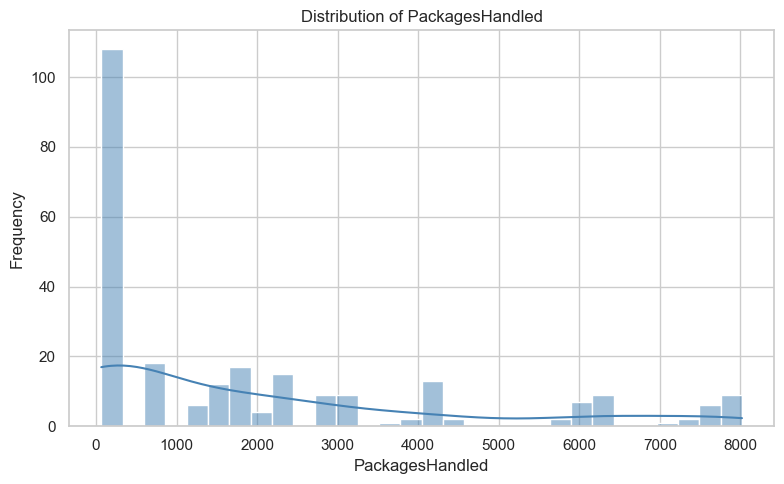

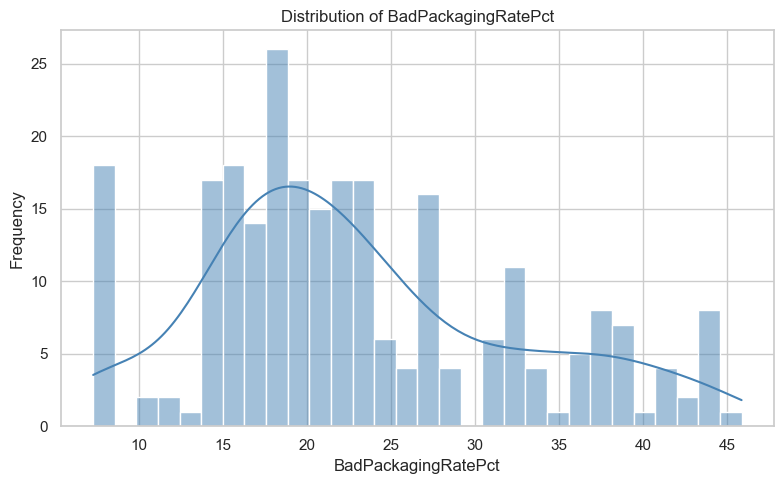

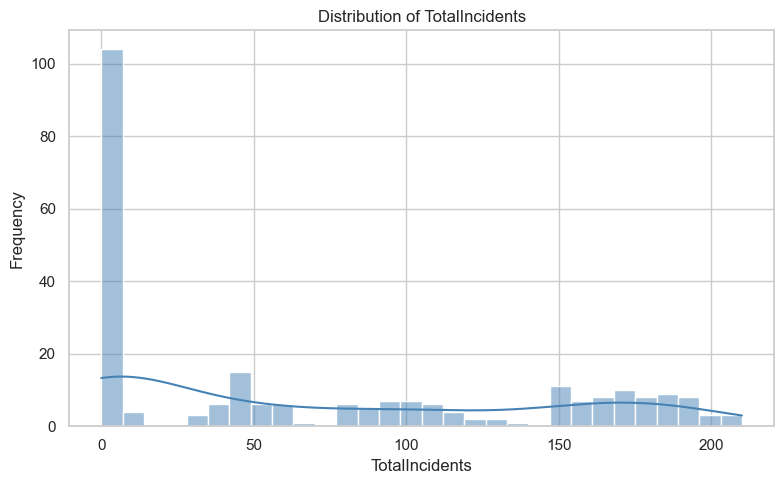

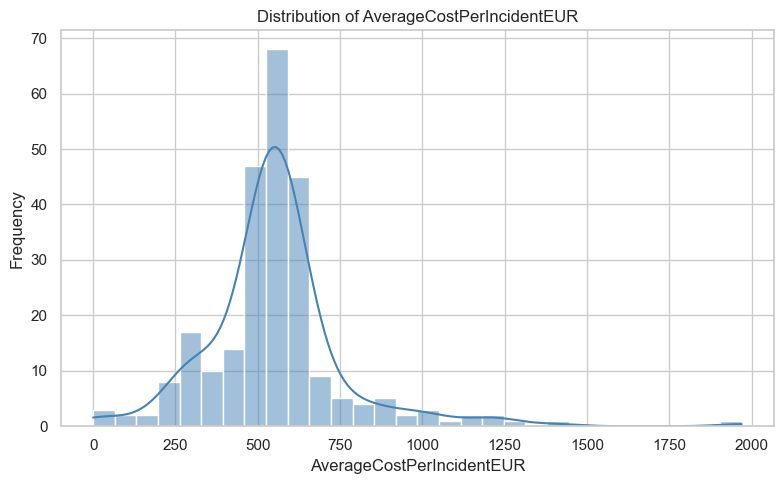

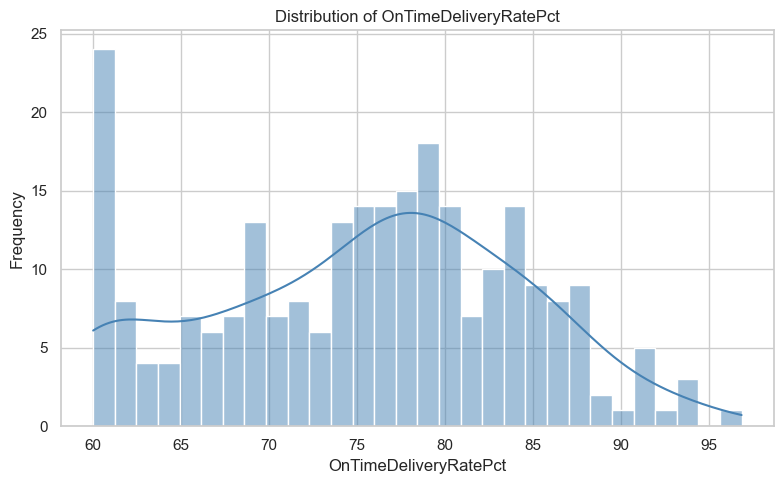

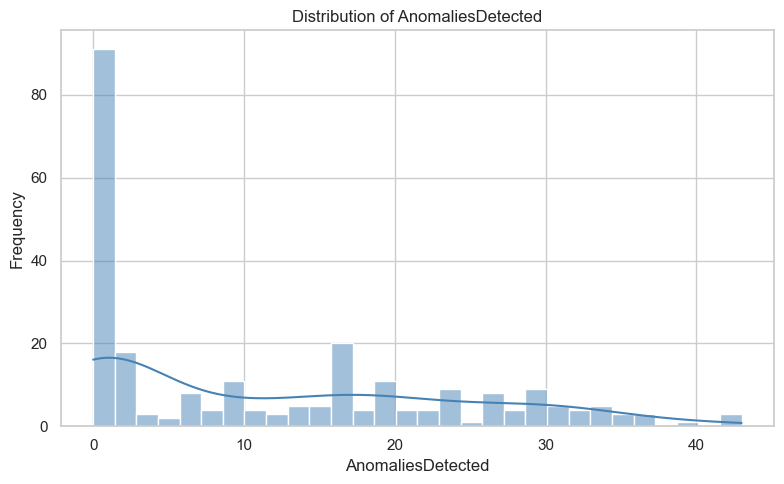

In [193]:
# Identify numerical columns
supplier_numeric_cols = supplier_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot histograms for numerical features
for col in supplier_numeric_cols:
    plt.figure()
    sns.histplot(supplier_df[col].dropna(), kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

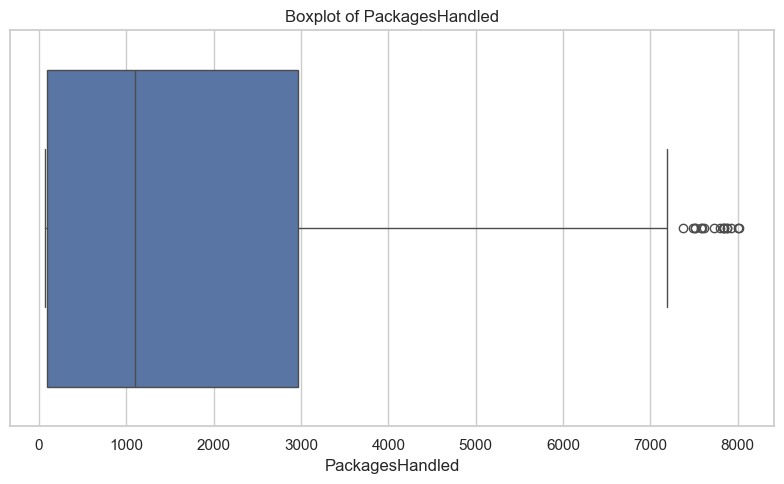

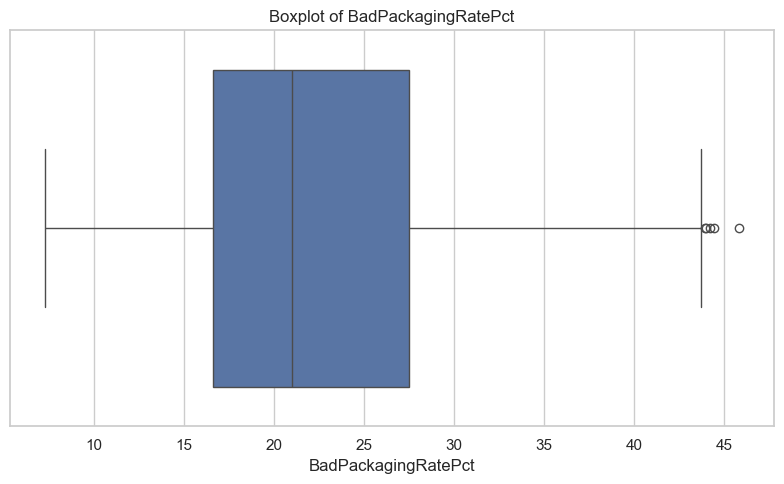

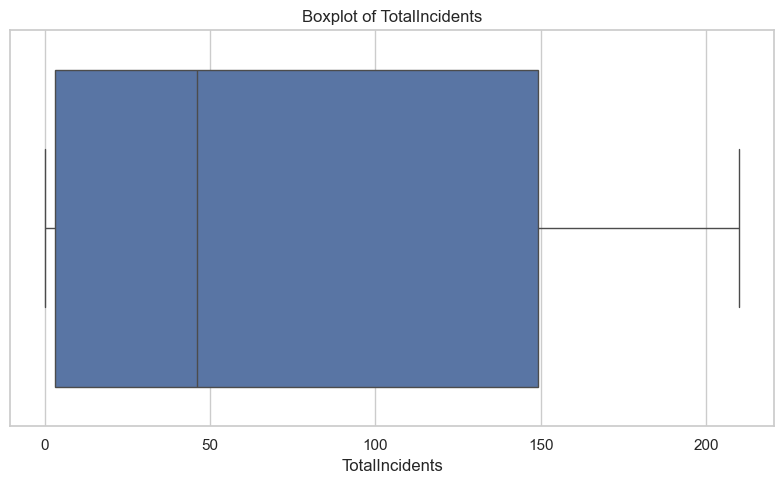

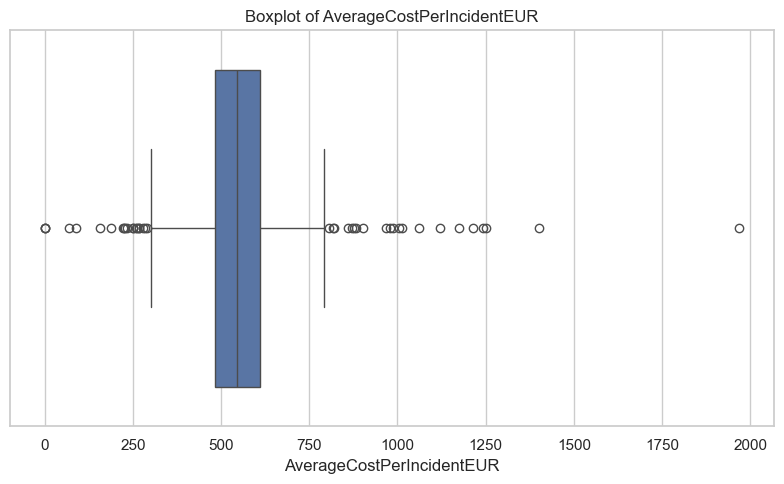

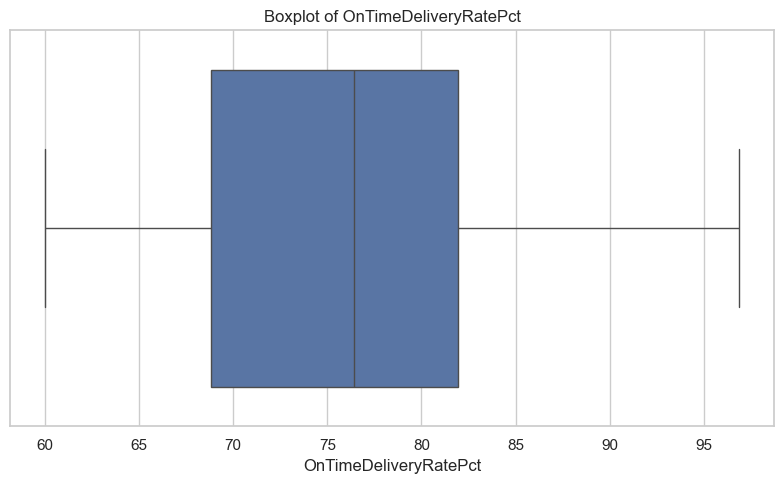

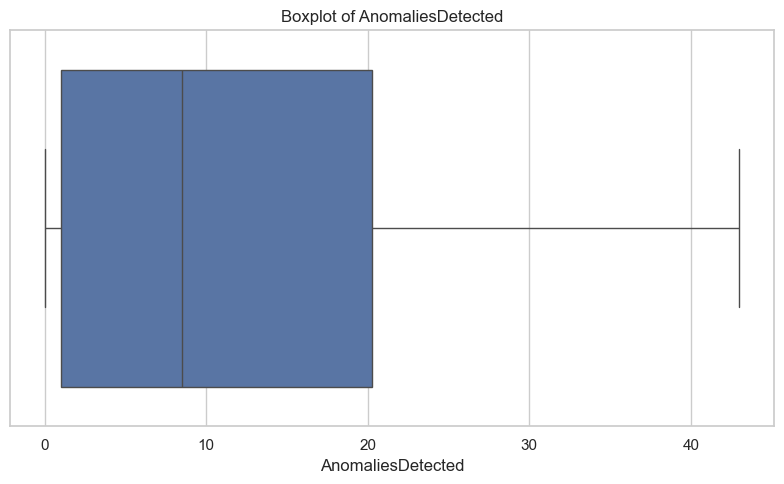

In [194]:
for col in supplier_numeric_cols:
    plt.figure()
    sns.boxplot(x=supplier_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Key Takeaways**

Packages Handled
- Highly right-skewed: Most suppliers handle fewer than 1,000 packages/month, but a small group handles 5,000–8,000, showing large scale disparities.
- Several extreme outliers present on the high end.

Bad Packaging Rate Pct
- Most range between 10%-30%
- Right-skewed distribution with some suppliers consistently above 40%, highlighting persistent quality issues

Total Incidents
- Most suppliers have 0-10 incidents, some hit 100-200+
- Box plot confirms the presence of long right-tail outliers

Average Cost Per Incident
- Most incidents cost around €500–600, with a tight interquartile range.
- Distribution is right-skewed with notable outliers exceeding €1,000–2,000, suggesting a few extremely expensive events.

Anomalies Detected
- Most records have 0–5 anomalies, but the distribution is again heavily skewed with values as high as 40+.
- Suggests either poor practices or higher scrutiny at certain suppliers.

### Bivariate Analysis

**Key Metrics by SupplierName**

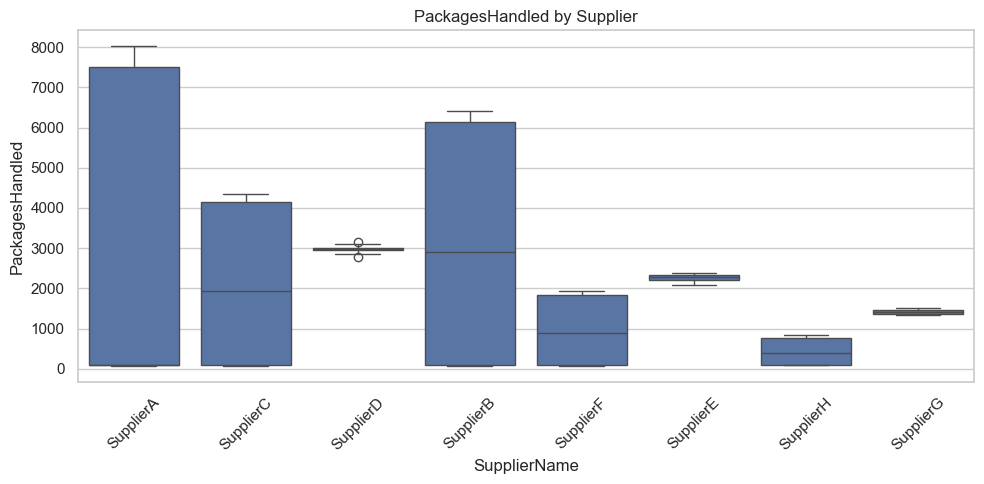

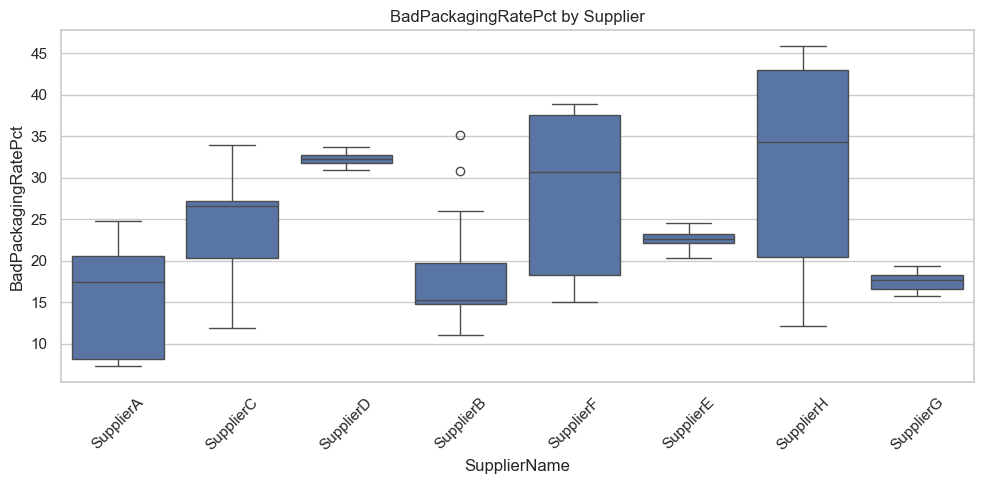

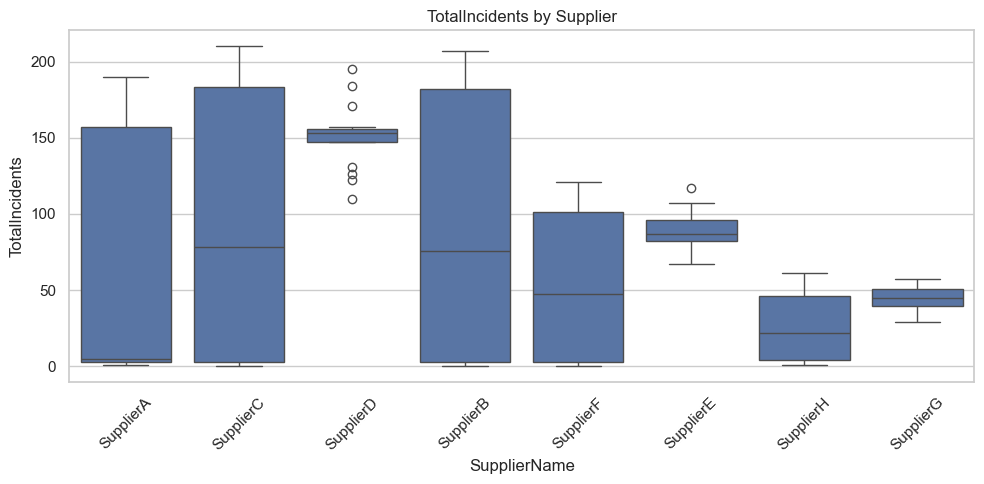

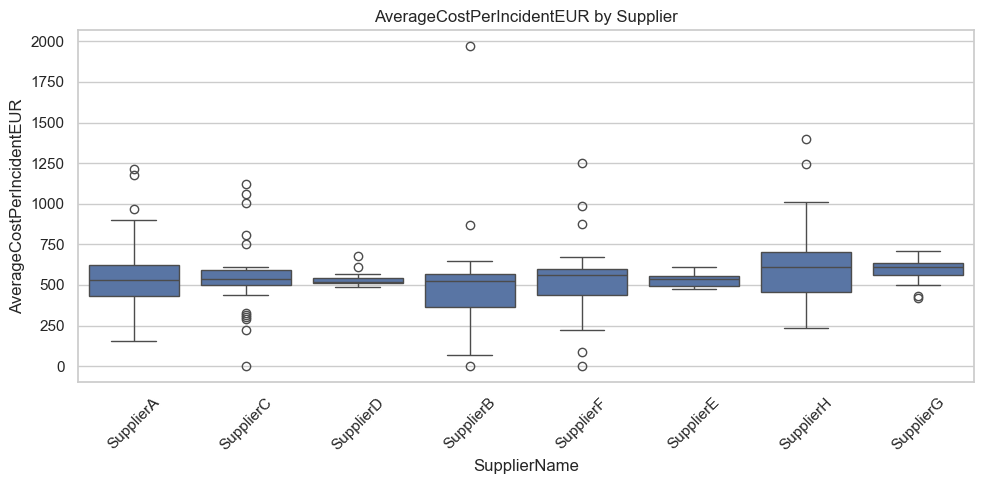

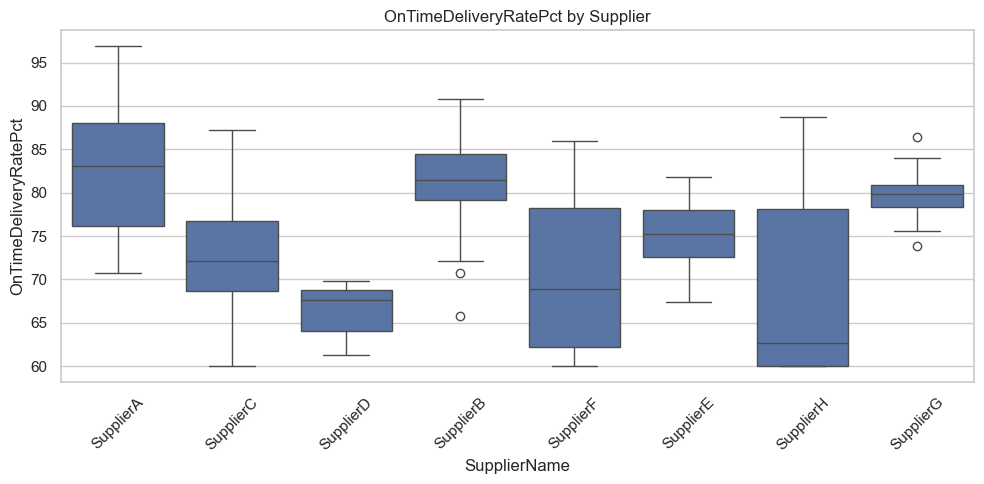

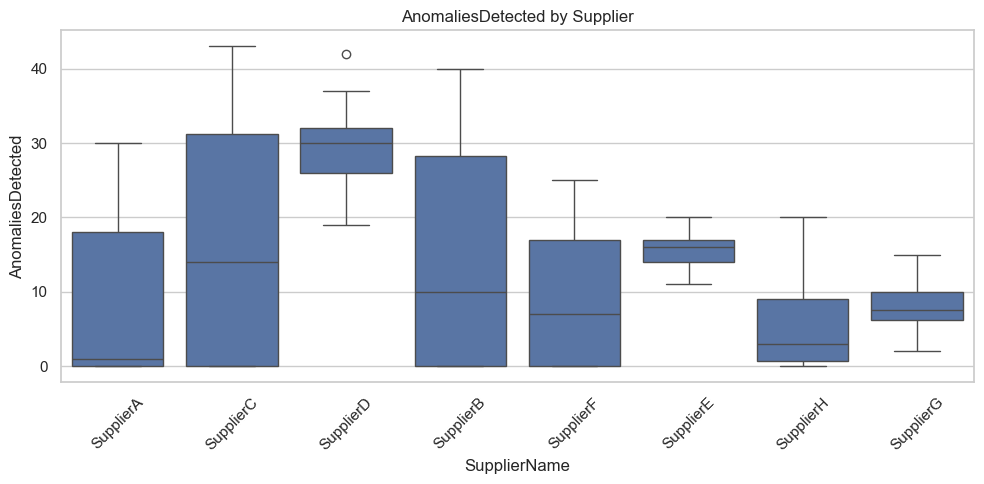

In [195]:
metrics_to_plot = ['PackagesHandled','BadPackagingRatePct', 'TotalIncidents', 'AverageCostPerIncidentEUR', 'OnTimeDeliveryRatePct', 'AnomaliesDetected']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=supplier_df, x='SupplierName', y=metric)
    plt.title(f"{metric} by Supplier")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Key Takeaways**

SupplierA
- Handles a large number of packages with generally good performance across all metrics.
- Appears reliable and consistent.

SupplierB
- High package volume but performance varies, with some concerns around incidents and delivery consistency.

SupplierC
- High number of incidents and anomalies suggest quality or operational issues.
- Performance appears inconsistent.

SupplierD
- Consistently poor quality and high incident rates.
- Likely a key driver of operational problems.

SupplierE
- Performs steadily across most metrics, no major red flags.

SupplierF
- Quality and delivery performance are below average.

SupplierG
- Strong performance across all metrics, especially in quality and consistency.
- Likely a top performer despite lower volumes.

SupplierH
- Quality and delivery issues stand out, may be under-resourced or facing operational challenges.

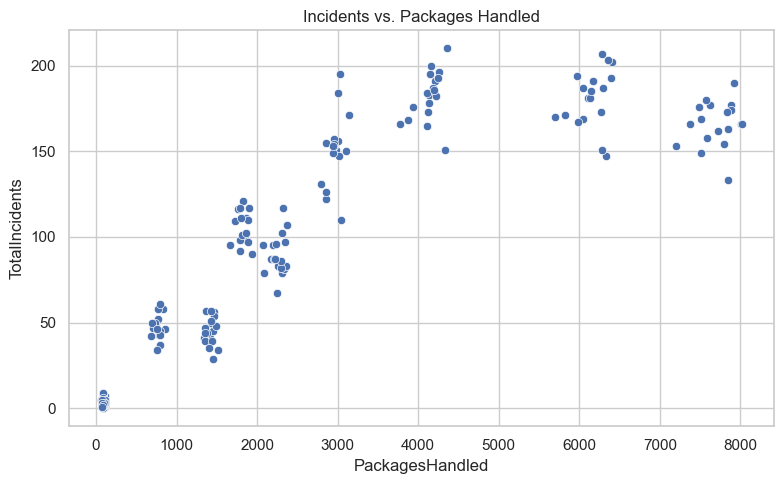

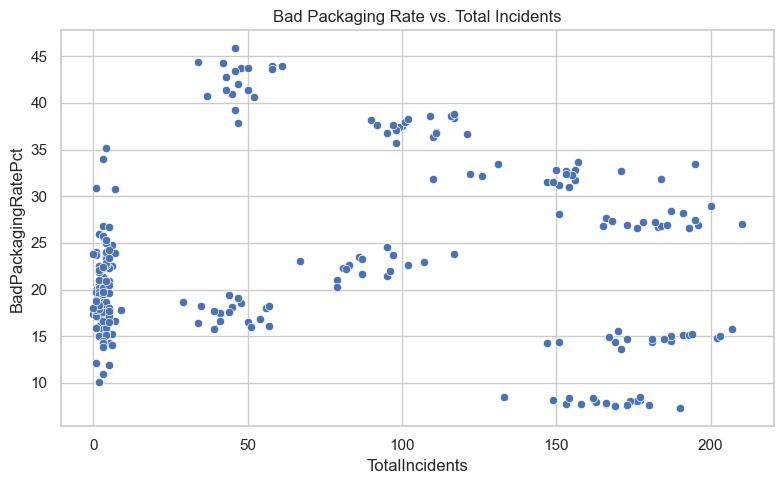

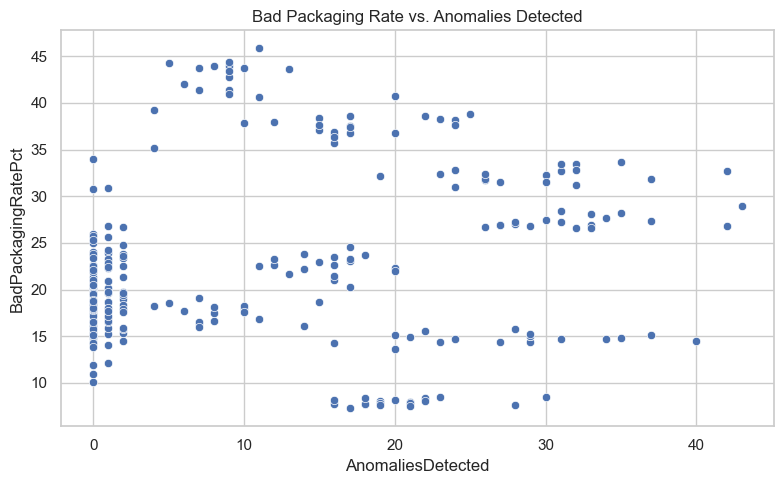

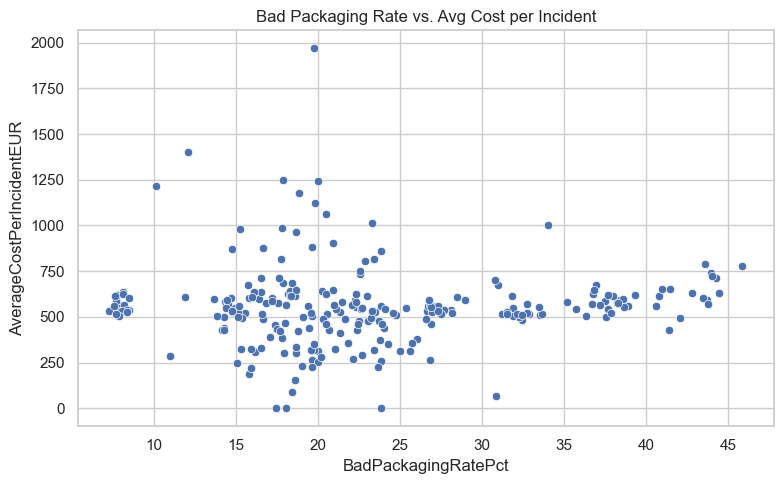

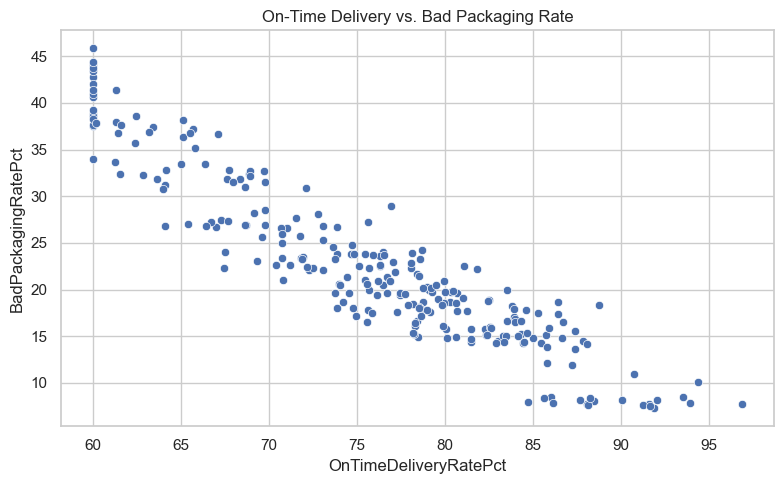

In [196]:
sns.scatterplot(data=supplier_df, x='PackagesHandled', y='TotalIncidents')
plt.title('Incidents vs. Packages Handled')
plt.tight_layout()
plt.show()

sns.scatterplot(data=supplier_df, x='TotalIncidents', y='BadPackagingRatePct')
plt.title('Bad Packaging Rate vs. Total Incidents')
plt.tight_layout()
plt.show()

sns.scatterplot(data=supplier_df, x='AnomaliesDetected', y='BadPackagingRatePct')
plt.title('Bad Packaging Rate vs. Anomalies Detected')
plt.tight_layout()
plt.show()

sns.scatterplot(data=supplier_df, x='BadPackagingRatePct', y='AverageCostPerIncidentEUR')
plt.title('Bad Packaging Rate vs. Avg Cost per Incident')
plt.tight_layout()
plt.show()

sns.scatterplot(data=supplier_df, x='OnTimeDeliveryRatePct', y='BadPackagingRatePct')
plt.title('On-Time Delivery vs. Bad Packaging Rate')
plt.tight_layout()
plt.show()

**Key Takeaways**

BadPackagingRatePct vs Total Incidents,  BadPackagingRatePct vs. AnomaliesDetected, BadPackagingRatePct vs. AverageCostPerIncidentEUR all showed no consistent relationship or no clear pattern

Incidents vs PackagesHandled
- Positive correlation: suppliers that handle more packages tend to have more incident reports
- Consider normalising incidents per package to avoid penalising high volume suppliers unfairly 

OnTimeDeliveryRatePct vs. BadPackagingRatePct
- Negative Correlation: worse delivery rates are associated with higher bad packaging rates
- Suggests some suppliers struggle operationally across the board, quality and delivery may share root causes


### Temporal Analysis

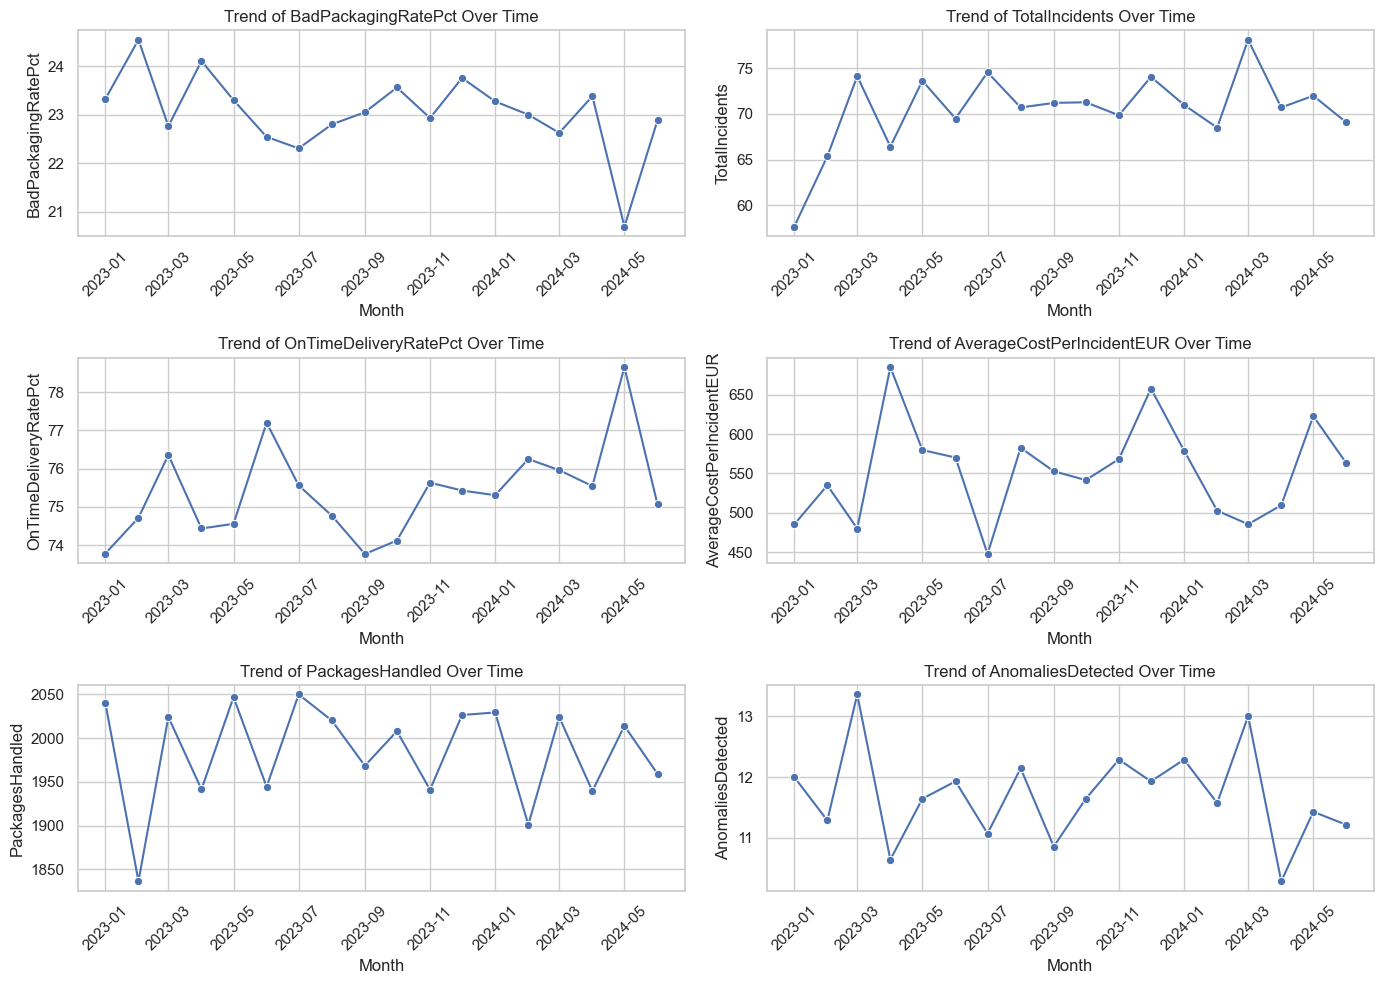

In [197]:
# Convert Month to datetime
supplier_df['Month'] = pd.to_datetime(supplier_df['Month'])

monthly_avg = supplier_df.groupby('Month')[
    ['BadPackagingRatePct', 'TotalIncidents', 'OnTimeDeliveryRatePct', 
     'AverageCostPerIncidentEUR', 'PackagesHandled', 'AnomaliesDetected']
].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Plot each metric over time
metrics = [
    'BadPackagingRatePct', 
    'TotalIncidents', 
    'OnTimeDeliveryRatePct', 
    'AverageCostPerIncidentEUR', 
    'PackagesHandled', 'AnomaliesDetected'
]

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=monthly_avg, x='Month', y=metric, marker='o')
    plt.title(f'Trend of {metric} Over Time')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

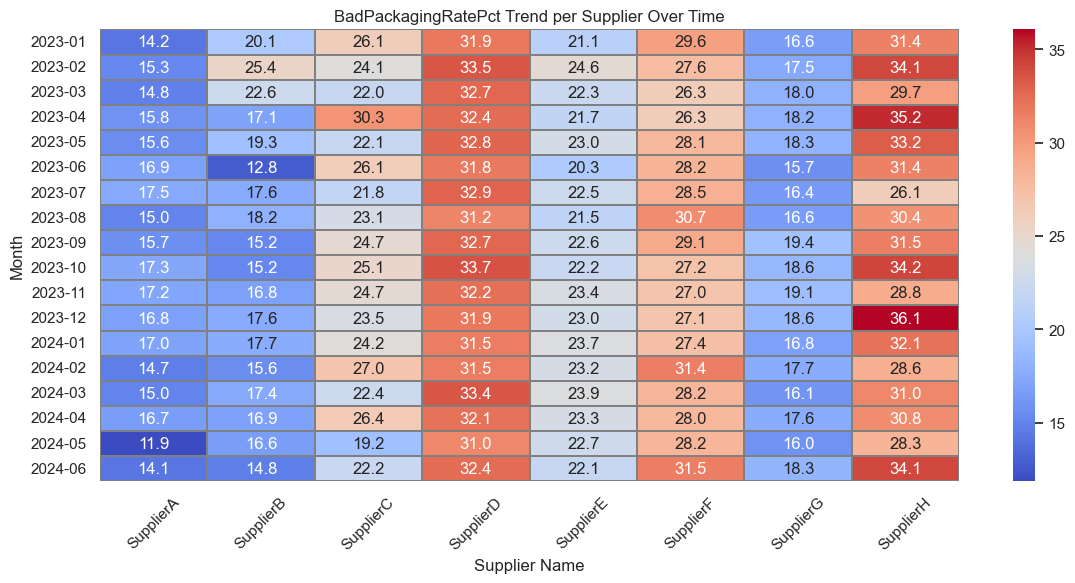

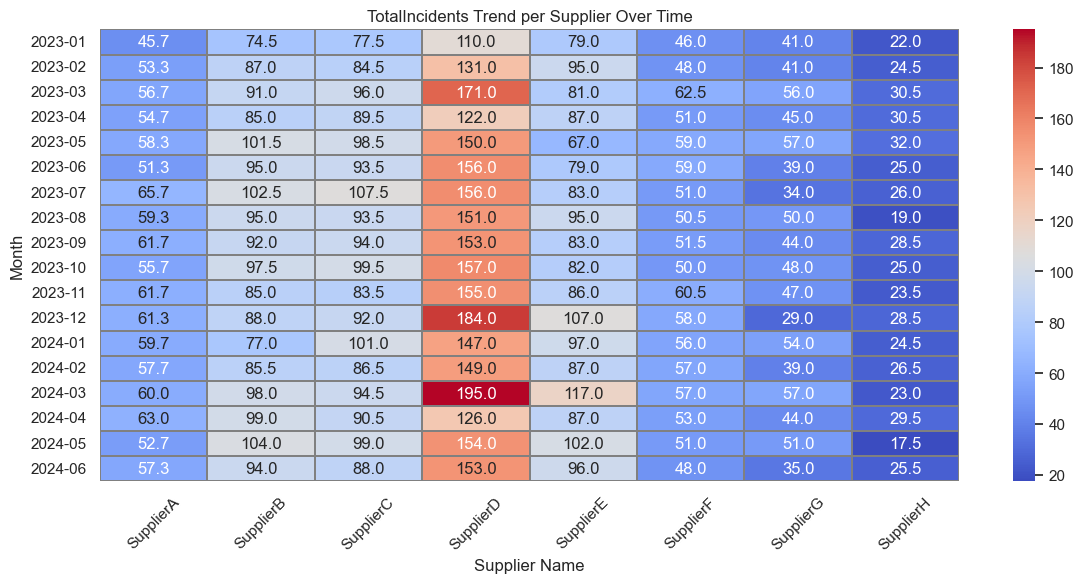

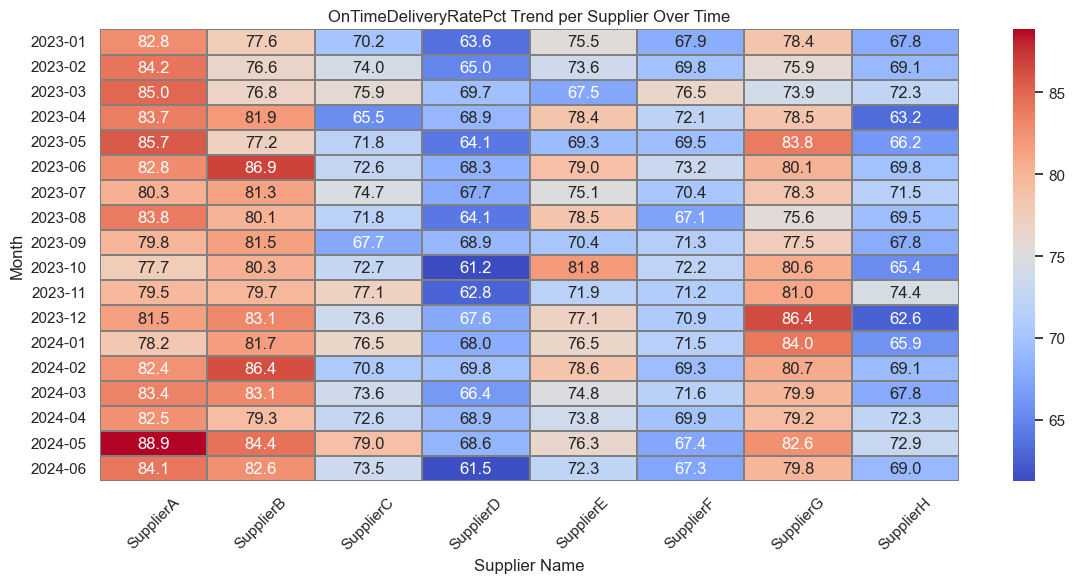

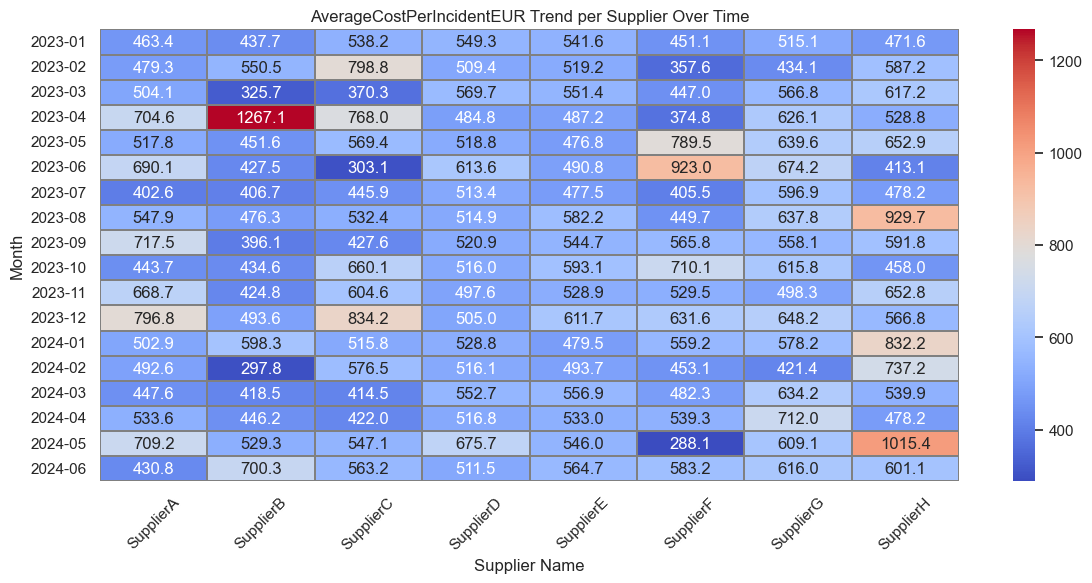

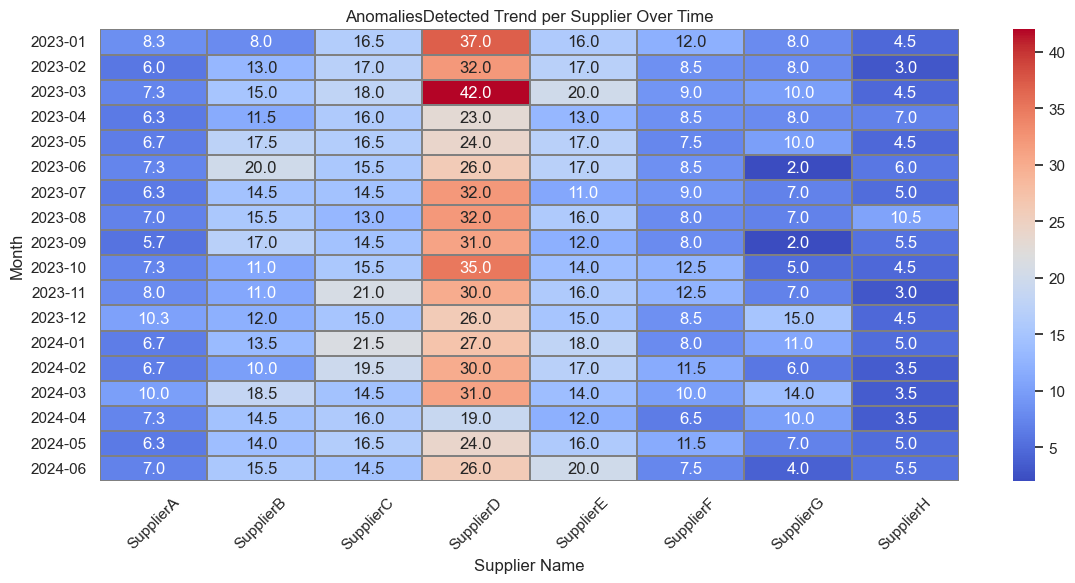

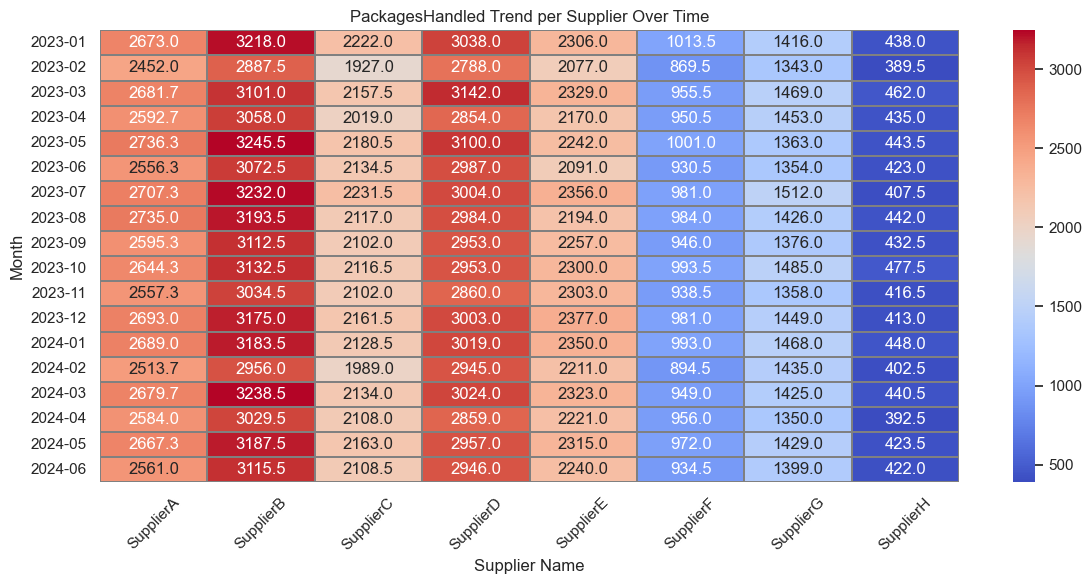

In [198]:
# Metrics to plot
metrics = [
    'BadPackagingRatePct',
    'TotalIncidents',
    'OnTimeDeliveryRatePct',
    'AverageCostPerIncidentEUR',
    'AnomaliesDetected',
    'PackagesHandled'
]

# Create a formatted string month for cleaner axis labels
supplier_df['MonthStr'] = supplier_df['Month'].dt.strftime('%Y-%m')

# Plot heatmaps for each metric
for metric in metrics:
    pivot = supplier_df.pivot_table(
        index='MonthStr', 
        columns='SupplierName', 
        values=metric, 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.3, linecolor='gray')
    plt.title(f'{metric} Trend per Supplier Over Time')
    plt.ylabel('Month')
    plt.xlabel('Supplier Name')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Key Takeaways**

| Metric                        | Overall Trend Observation                                                   | Consistency with Heatmap Findings                                                                                        |
| ----------------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Bad Packaging Rate (%)**    | Fairly stable around 22–24%, with a dip in Apr 2024 and slight recovery.    | Matches heatmaps: Most suppliers had stable or improving rates; Supplier D and H remained high, causing overall lift.    |
| **Total Incidents**           | Gradual increase through early 2023, peaking in Mar 2024, then stabilizing. | Supported by Supplier D's consistently high incidents and a few peaks across Supplier B and C.                           |
| **On-Time Delivery Rate (%)** | Slight upward trend into 2024, with spikes in May–Jun 2024.                 | Consistent with Supplier A and B showing improvement; Supplier D and H remain lower in comparison.                       |
| **Average Cost per Incident** | Fluctuates but trending slightly upward again in May–Jun 2024.              | Reflects heatmap outliers: cost spikes at Supplier B (Apr 2023) and Supplier H (May 2024).                               |
| **Packages Handled**          | Overall stable with mild cyclical variance.                                 | Heatmaps support this: most suppliers have consistent throughput over time.                                              |
| **Anomalies Detected**        | Range-bound, with a small drop in May 2024.                                 | Matches the general stability shown in the heatmaps, though Supplier D continues to report significantly more anomalies. |


# Historical Incidents

### Univariate Analysis

In [199]:
incidents_df.columns

Index(['ProductReference', 'SupplierName', 'DateOfIncident',
       'IssueDescription', 'ResolutionStatus', 'CostImpactEUR'],
      dtype='object')

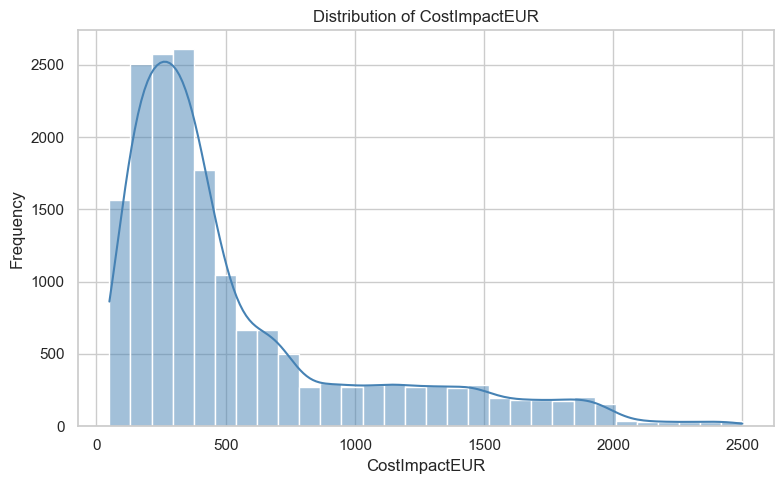

In [200]:
# Identify numerical columns
incident_numerical_cols = incidents_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot histograms for numerical features
for col in incident_numerical_cols:
    plt.figure()
    sns.histplot(incidents_df[col].dropna(), kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

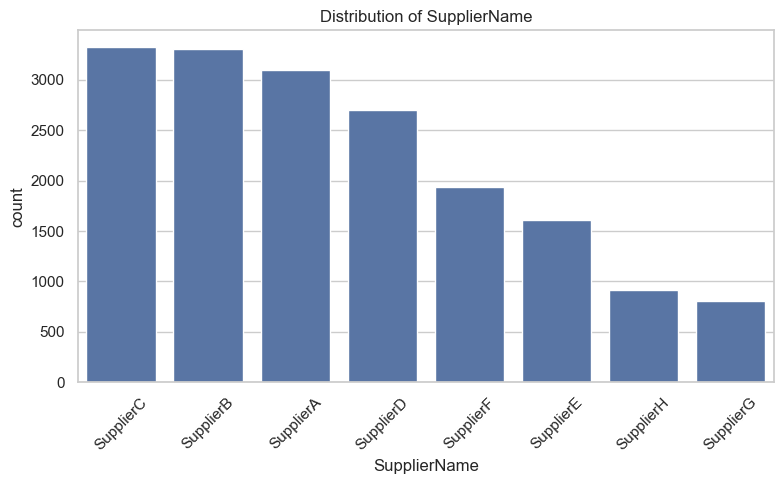

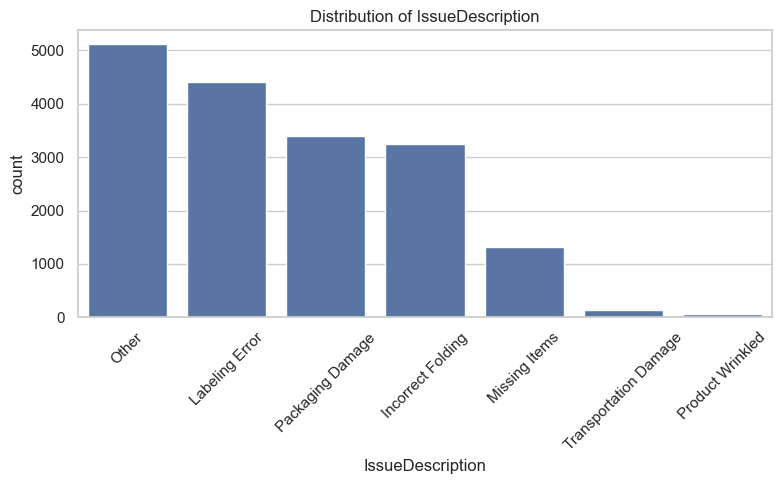

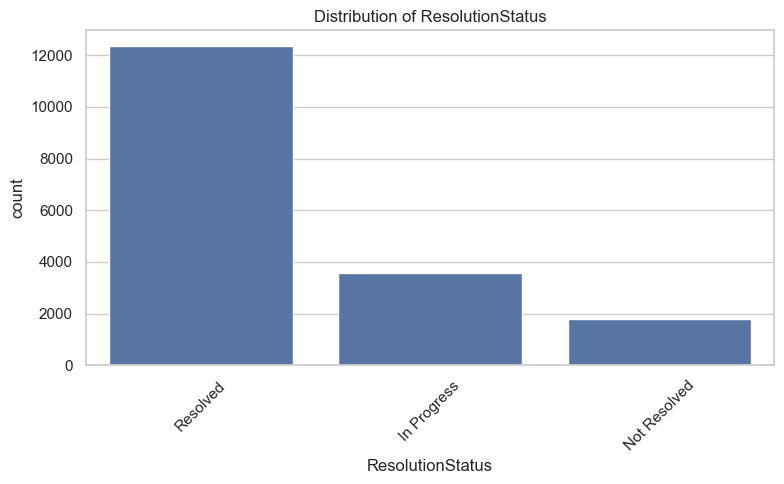

In [201]:
# Identify categorical columns
incident_categorical_cols = incidents_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot countplots for categorical columns (limit to top 20 unique values)
for col in incident_categorical_cols:
    if incidents_df[col].nunique() <= 20:
        plt.figure()
        sns.countplot(data=incidents_df, x=col, order=incidents_df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Bivariate Analysis

In our previous analysis, Supplier A, Supplier B, and Supplier C appeared to perform relatively well across key operational metrics in the supplier scorecard. However, when examining the historical incidents dataset, these same suppliers show the highest number of reported incidents. To investigate if **high incident counts are a sign of poor performance, or simply a reflection of higher order** volumes we will explore:
- What types of issues are commonly reported for each supplier: this will help us identify if certain suppliers are disproportionately associated with specific types of problems.
- Normalized issue distributions per supplier: by converting raw incident counts into percentages relative to each supplier's total incidents, we can better assess whether certain suppliers have riskier issue profiles independent of their volume.

**Supplier by Issue Type**

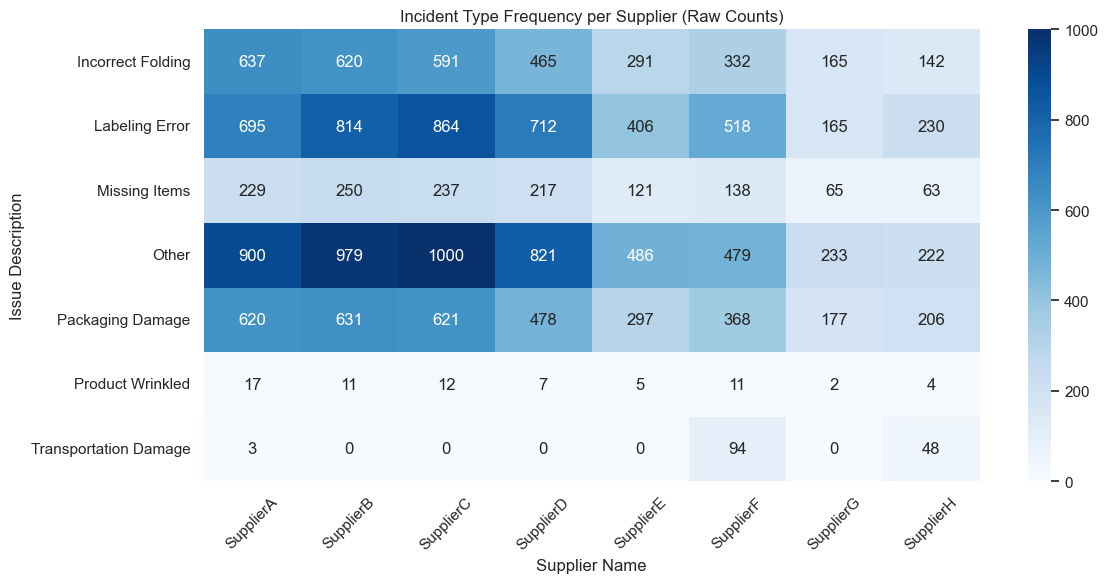

In [208]:
# Pivot to get counts in matrix form
heatmap_data = incidents_df.pivot_table(
    index='IssueDescription',
    columns='SupplierName',
    values='CostImpactEUR',  # any column will work with 'count'
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Incident Type Frequency per Supplier (Raw Counts)')
plt.ylabel('Issue Description')
plt.xlabel('Supplier Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Normalised Supplier by Issue Type**
- To fairly compare suppliers, we calculated the **average number of packages handled by each supplier** during the incident reporting period.
- We then **normalized the incident counts** by dividing them by this average, giving us the **incident rate per 10,000 packages**, a standardized view of performance regardless of supplier size.

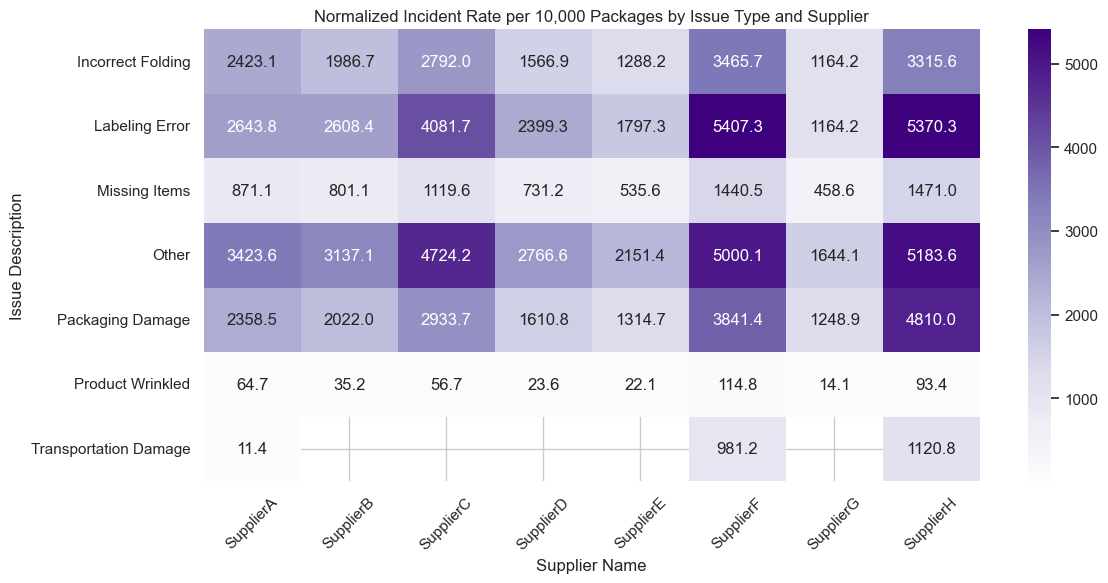

In [209]:
# --- Step 1: Prepare Month fields ---

# Convert incident dates and apply lag
incidents_df['Month_Lag'] = pd.to_datetime(incidents_df['DateOfIncident']) - pd.offsets.MonthBegin(1)
incidents_df['Month_Lag'] = incidents_df['Month_Lag'].dt.to_period('M').dt.to_timestamp()

# Convert supplier month to timestamp (assumes it's already datetime)
supplier_df['Month'] = pd.to_datetime(supplier_df['Month'])

# --- Step 2: Filter supplier data to incident-relevant months ---
incident_months = incidents_df['Month_Lag'].unique()
supplier_window_df = supplier_df[supplier_df['Month'].isin(incident_months)]

# --- Step 3: Compute average packages handled per supplier over that window ---
avg_packages_per_supplier = (
    supplier_window_df.groupby('SupplierName')['PackagesHandled']
    .mean()
    .reset_index(name='AvgPackagesDuringIncidents')
)

# --- Step 4: Count incidents per supplier and issue type ---
issue_counts = (
    incidents_df.groupby(['SupplierName', 'IssueDescription'])
    .size()
    .reset_index(name='IncidentCount')
)

# --- Step 5: Merge counts with average package volumes ---
normalized_df = pd.merge(issue_counts, avg_packages_per_supplier, on='SupplierName', how='left')

# --- Step 6: Normalize per 10,000 packages ---
normalized_df['IncidentsPer10k'] = (normalized_df['IncidentCount'] / normalized_df['AvgPackagesDuringIncidents']) * 10000

# --- Step 7: Pivot for heatmap ---
heatmap_data = normalized_df.pivot(index='IssueDescription', columns='SupplierName', values='IncidentsPer10k')

# --- Step 8: Plot heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Purples')
plt.title('Normalized Incident Rate per 10,000 Packages by Issue Type and Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Issue Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Final Comparison of Supplier Scorecard and Historical Incident Findings**

| Supplier         | Scorecard Insights                                                           | Normalized Heatmap Insights                                                                                                                       |
| ---------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Supplier A–C** | Previously looked good in KPIs, but high raw incident counts raised concerns | After normalization, their incident rates per 10k packages are **moderate**, showing that high volume likely caused the high raw incident counts. |
| **Supplier D**   | Poorer KPI performance (e.g. packaging rate, cost per incident, anomalies)   | Stands out **less** in raw count, but **normalized rates** (per package) are consistently higher—confirming it's a genuine underperformer.        |
| **Supplier H**   | High bad packaging & cost outlier (May 2024)                                 | Shows **elevated normalized rates** across several issue types, affirming the concern.                                                            |
| **Supplier F**   | Middling performance in scorecard                                            | Appears as an **outlier** in normalized labeling & packaging issues—merits closer review.                                                         |
| **Supplier G**   | Consistently low scores across metrics                                       | Incident rates remain **low** after normalization—confirming they handle fewer orders and perform reliably.                                       |


**Resolution Status vs Supplier Name**
- Goal is to see if some suppliers are more likely to have unresolved or in-progress incidents
- A high volume of unresolved issues could signal poor communication, accountability, or support.

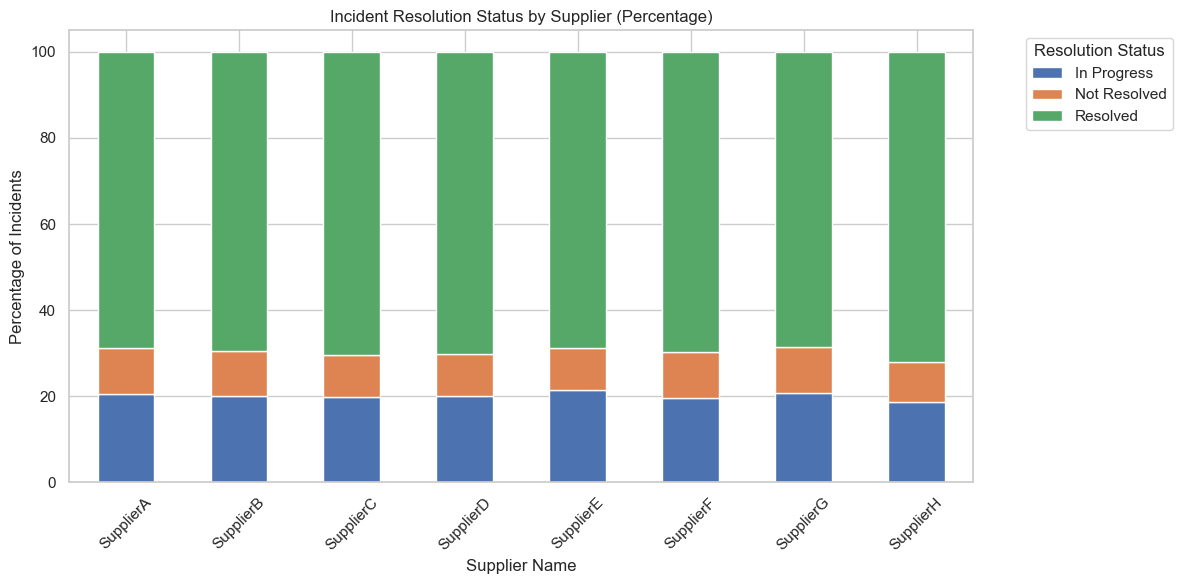

In [219]:
# Group and count incidents by Supplier and ResolutionStatus
resolution_counts = incidents_df.groupby(['SupplierName', 'ResolutionStatus']).size().unstack(fill_value=0)

# Normalize to percentages
resolution_percentages = resolution_counts.divide(resolution_counts.sum(axis=1), axis=0) * 100

# Plot as a stacked bar chart
ax = resolution_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Incident Resolution Status by Supplier (Percentage)')
plt.ylabel('Percentage of Incidents')
plt.xlabel('Supplier Name')
plt.xticks(rotation=45)
plt.legend(title='Resolution Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Key Takeaway**
- There’s no obvious supplier that has a dramatically worse resolution pattern

**Cost Impact EUR vs Supplier Name**

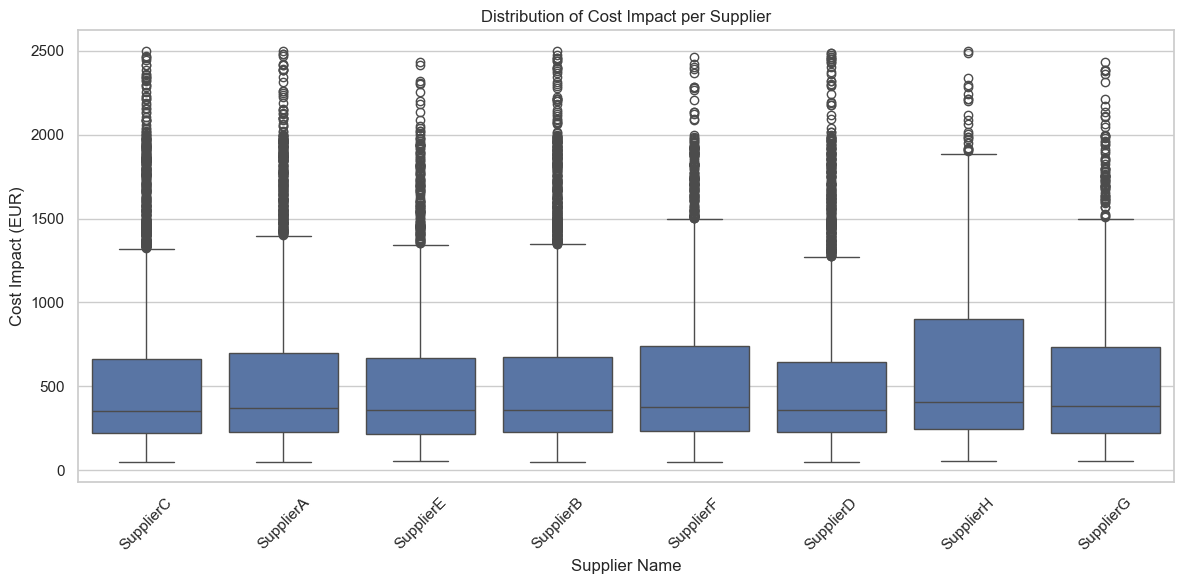

In [222]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=incidents_df, x='SupplierName', y='CostImpactEUR')
plt.title('Distribution of Cost Impact per Supplier')
plt.ylabel('Cost Impact (EUR)')
plt.xlabel('Supplier Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Takeaways**
- Supplier H should be examined for cost control issues or incident types driving higher variability.
- Other suppliers are more consistent in cost impact but still prone to occasional high-cost incidents.